In [3]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, './renderer')
sys.path.insert(0, '../')

from collections import namedtuple
import render_car_instances as rci
import utils.utils as uts
import glob
import os

import numpy as np
np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
%matplotlib inline

import ntpath
pattern = '*%s*.%s' % ('_Camera_', 'jpg')

# Write pose maps to .npy files

In [4]:
codes_path = '/home/zhurui/Documents/deeplab/datasets/apolloscape/codes.npy'
codes = np.load(codes_path)

print codes.shape
print np.amax(codes, axis=1)
print np.amin(codes, axis=1)

(10, 79)
[ 178.28910248  115.51393668   57.03229368   52.01892509   34.43211276
   28.330886     29.73572869   22.20194261   24.38559555   16.80222497]
[-153.42648642  -43.61184639  -42.57945933  -48.76380611  -24.94452819
  -21.80847851  -23.55144461  -18.07993577  -19.53430809  -15.2705038 ]


# Clean combined dataset

In [60]:
unique_lists = []
for split in ['train', 'val']:
    list_path = '/home/zhurui/Documents/deeplab/datasets/apolloscape/combined/train/split_dup/%s.txt'%split
    with open(list_path) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content]
    print len(content)
    unique_content = list(set(content))
    print len(unique_content)
    
    unique_lists.append(unique_content)

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))
print len(intersection(unique_lists[0], unique_lists[1]))

final_lists = {}
final_lists['train'] = list(set(unique_lists[0]) - set(unique_lists[1]))
final_lists['val'] = unique_lists[1]
print len(final_lists['train']), len(final_lists['val'])

for split in ['train', 'val']:
    list_path = '/home/zhurui/Documents/deeplab/datasets/apolloscape/combined/train/split/%s.txt'%split
    thefile = open(list_path, 'w')
    for item in final_lists[split]:
      thefile.write("%s\n" % item)

4672
4622
480
480
11
4611 480


In [90]:
print final_lists['train'][0]
final_lists['train'].index('171206_065903173_Camera_6.jpg')

180116_054000247_Camera_5.jpg


1176

In [9]:
from PIL import Image
import h5py
import scipy.io as sio
import matplotlib.pyplot as plt
import utils.utils as uts

splits = ['train']
# splits = ['train', 'test']

for split in splits:
    Setting = namedtuple('Setting', ['data_dir'])
    setting = Setting('../apolloscape/combined/%s/'%split)

    visualizer = rci.CarPoseVisualizer(setting, scale=0.2, codes=codes)
    visualizer.load_car_models()
    apollo_images_root = '/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/%s/images'%split
    print apollo_images_root
    search_files = os.path.join(apollo_images_root, pattern)
    filenames = sorted(glob.glob(search_files))
    print len(filenames)
    for file_idx, filename in enumerate(filenames[1690:]):
        print '--- %d/%d...'%(file_idx, len(filenames))
        image_name = ntpath.basename(filename).replace('.jpg', '')
        folder_name = 'pose_maps_02'
        plot_path = filename.replace('images', folder_name).replace('.jpg', '_plot.jpg')
        
#         if os.path.isfile(filename.replace('images', folder_name).replace('.jpg', '_shape_id.png')):
# #             print 'Skipping '+filename
#             continue

        image_vis, seg_array, shape_id_map, depth, pose_map, image_rescaled, pose_list, shape_id_list = visualizer.showAnn(image_name, if_visualize=False, if_save=True, plot_path=plot_path)
#         print pose_map.shape, pose_map.dtype
        assert len(pose_list) == len(shape_id_list)
        if not(len(pose_list) == len(shape_id_list) == np.max(seg_array)):
            print len(pose_list), len(shape_id_list), np.max(seg_array)
            print filename
        
        image_rescaled = Image.fromarray(np.uint8(image_rescaled))
        image_rescaled_name = filename.replace('images', folder_name).replace('.jpg', '_rescaled.png')
        image_rescaled.save(image_rescaled_name)

        image_vis = Image.fromarray(np.uint8(image_vis))
        image_vis_name = filename.replace('images', folder_name).replace('.jpg', '_vis.png')
        image_vis.save(image_vis_name)

        seg = Image.fromarray(np.uint8(seg_array))
        seg_name = filename.replace('images', folder_name).replace('.jpg', '_seg.png')
        seg.save(seg_name)
        
        shape_id = Image.fromarray(np.uint8(shape_id_map))
        shape_id_name = filename.replace('images', folder_name).replace('.jpg', '_shape_id.png')
        shape_id.save(shape_id_name)

        pose_dict_path = filename.replace('images', folder_name).replace('.jpg', '_posedict.npy')
        pose_list_array = np.asarray(pose_list)
        np.save(pose_dict_path, np.float32(pose_list_array)) 

        pose_list, shape_id_list = visualizer.showId(image_name)

        shape_id_dict_path = filename.replace('images', folder_name).replace('.jpg', '_shapeiddict.npy')
        shape_id_list_array = np.asarray(shape_id_list)
        np.save(shape_id_dict_path, np.float32(shape_id_list_array)) 

        
# #         ignore_mask_path = filename.replace('images', 'ignore_mask')
#         if file_idx<20:
#             uts.plot_images({'seg_array': plt.imread(seg_name)}, 
#                             layout=[1, 1], fig_size=3, save_fig=False, fig_name='seg_array')

#         print 'Saved to '+shape_id_dict_path

#         break

INFO:root:loading 79 car models


/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images
5091
--- 0/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_034329607_Camera_5.jpg
(544, 680, 6) float64
--- 1/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_034331601_Camera_5.jpg
(544, 680, 6) float64
--- 2/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_034333596_Camera_5.jpg
(544, 680, 6) float64
--- 3/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_034337586_Camera_5.jpg
(544, 680, 6) float64
--- 4/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_03

--- 44/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_034717651_Camera_5.jpg
(544, 680, 6) float64
--- 45/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_034720891_Camera_5.jpg
(544, 680, 6) float64
--- 46/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_034724191_Camera_5.jpg
(544, 680, 6) float64
--- 47/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_034731475_Camera_5.jpg
(544, 680, 6) float64
--- 48/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_034737126_Camera_5.jpg
(544, 680, 6) float64
--- 49/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_m

--- 89/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_035700872_Camera_5.jpg
(544, 680, 6) float64
--- 90/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_035713872_Camera_5.jpg
(544, 680, 6) float64
--- 91/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_035723910_Camera_5.jpg
(544, 680, 6) float64
--- 92/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_035727238_Camera_5.jpg
(544, 680, 6) float64
--- 93/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_035729863_Camera_5.jpg
(544, 680, 6) float64
--- 94/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_m

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_040207479_Camera_5.jpg
(544, 680, 6) float64
--- 134/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_040209879_Camera_5.jpg
(544, 680, 6) float64
--- 135/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_040217078_Camera_5.jpg
(544, 680, 6) float64
--- 136/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_040219478_Camera_5.jpg
(544, 680, 6) float64
--- 137/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_040221878_Camera_5.jpg
(544, 680, 6) float64
--- 138/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfittin

--- 178/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_040527818_Camera_5.jpg
(544, 680, 6) float64
--- 179/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_040539910_Camera_5.jpg
(544, 680, 6) float64
--- 180/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_040557436_Camera_5.jpg
(544, 680, 6) float64
--- 181/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_040609009_Camera_5.jpg
(544, 680, 6) float64
--- 182/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_040612566_Camera_5.jpg
(544, 680, 6) float64
--- 183/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_041151956_Camera_5.jpg
(544, 680, 6) float64
--- 223/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_041204649_Camera_5.jpg
(544, 680, 6) float64
--- 224/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_041207049_Camera_5.jpg
(544, 680, 6) float64
--- 225/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_041209449_Camera_5.jpg
(544, 680, 6) float64
--- 226/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_041214249_Camera_5.jpg
(544, 680, 6) float64
--- 227/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfittin

--- 267/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_041743828_Camera_5.jpg
(544, 680, 6) float64
--- 268/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_041746363_Camera_5.jpg
(544, 680, 6) float64
--- 269/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_041751933_Camera_5.jpg
(544, 680, 6) float64
--- 270/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_041757602_Camera_5.jpg
(544, 680, 6) float64
--- 271/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_041810846_Camera_5.jpg
(544, 680, 6) float64
--- 272/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_042339813_Camera_5.jpg
(544, 680, 6) float64
--- 312/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_042342674_Camera_5.jpg
(544, 680, 6) float64
--- 313/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_042346229_Camera_5.jpg
(544, 680, 6) float64
--- 314/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_042349784_Camera_5.jpg
(544, 680, 6) float64
--- 315/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_042400581_Camera_5.jpg
(544, 680, 6) float64
--- 316/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfittin

--- 356/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053500998_Camera_5.jpg
(544, 680, 6) float64
--- 357/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053502388_Camera_5.jpg
(544, 680, 6) float64
--- 358/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053503778_Camera_5.jpg
(544, 680, 6) float64
--- 359/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053539142_Camera_5.jpg
(544, 680, 6) float64
--- 360/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053541982_Camera_5.jpg
(544, 680, 6) float64
--- 361/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053650313_Camera_5.jpg
(544, 680, 6) float64
--- 401/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053651523_Camera_5.jpg
(544, 680, 6) float64
--- 402/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053652733_Camera_5.jpg
(544, 680, 6) float64
--- 403/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053655153_Camera_5.jpg
(544, 680, 6) float64
--- 404/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053656363_Camera_5.jpg
(544, 680, 6) float64
--- 405/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfittin

--- 445/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053952450_Camera_5.jpg
(544, 680, 6) float64
--- 446/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053952679_Camera_5.jpg
(544, 680, 6) float64
--- 447/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053952888_Camera_5.jpg
(544, 680, 6) float64
--- 448/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053953097_Camera_5.jpg
(544, 680, 6) float64
--- 449/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_053953306_Camera_5.jpg
(544, 680, 6) float64
--- 450/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054000100_Camera_5.jpg
(544, 680, 6) float64
--- 490/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054000247_Camera_5.jpg
(544, 680, 6) float64
--- 491/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054000394_Camera_5.jpg
(544, 680, 6) float64
--- 492/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054000541_Camera_5.jpg
(544, 680, 6) float64
--- 493/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054000688_Camera_5.jpg
(544, 680, 6) float64
--- 494/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfittin

--- 534/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054006715_Camera_5.jpg
(544, 680, 6) float64
--- 535/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054006862_Camera_5.jpg
(544, 680, 6) float64
--- 536/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054007009_Camera_5.jpg
(544, 680, 6) float64
--- 537/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054007156_Camera_5.jpg
(544, 680, 6) float64
--- 538/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054007303_Camera_5.jpg
(544, 680, 6) float64
--- 539/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054019086_Camera_5.jpg
(544, 680, 6) float64
--- 579/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054019193_Camera_5.jpg
(544, 680, 6) float64
--- 580/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054019300_Camera_5.jpg
(544, 680, 6) float64
--- 581/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054019407_Camera_5.jpg
(544, 680, 6) float64
--- 582/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054019514_Camera_5.jpg
(544, 680, 6) float64
--- 583/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfittin

--- 623/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054026147_Camera_5.jpg
(544, 680, 6) float64
--- 624/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054026254_Camera_5.jpg
(544, 680, 6) float64
--- 625/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054026361_Camera_5.jpg
(544, 680, 6) float64
--- 626/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054026468_Camera_5.jpg
(544, 680, 6) float64
--- 627/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054026575_Camera_5.jpg
(544, 680, 6) float64
--- 628/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054030855_Camera_5.jpg
(544, 680, 6) float64
--- 668/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054030962_Camera_5.jpg
(544, 680, 6) float64
--- 669/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054031069_Camera_5.jpg
(544, 680, 6) float64
--- 670/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054031176_Camera_5.jpg
(544, 680, 6) float64
--- 671/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054031283_Camera_5.jpg
(544, 680, 6) float64
--- 672/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfittin

--- 712/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054035670_Camera_5.jpg
(544, 680, 6) float64
--- 713/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054035777_Camera_5.jpg
(544, 680, 6) float64
--- 714/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054035884_Camera_5.jpg
(544, 680, 6) float64
--- 715/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054035991_Camera_5.jpg
(544, 680, 6) float64
--- 716/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054036098_Camera_5.jpg
(544, 680, 6) float64
--- 717/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054040658_Camera_5.jpg
(544, 680, 6) float64
--- 757/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054040785_Camera_5.jpg
(544, 680, 6) float64
--- 758/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054040912_Camera_5.jpg
(544, 680, 6) float64
--- 759/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054041039_Camera_5.jpg
(544, 680, 6) float64
--- 760/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054041166_Camera_5.jpg
(544, 680, 6) float64
--- 761/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfittin

--- 801/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054046372_Camera_5.jpg
(544, 680, 6) float64
--- 802/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054046499_Camera_5.jpg
(544, 680, 6) float64
--- 803/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054046626_Camera_5.jpg
(544, 680, 6) float64
--- 804/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054046753_Camera_5.jpg
(544, 680, 6) float64
--- 805/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054046880_Camera_5.jpg
(544, 680, 6) float64
--- 806/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054052087_Camera_5.jpg
(544, 680, 6) float64
--- 846/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054052214_Camera_5.jpg
(544, 680, 6) float64
--- 847/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054052341_Camera_5.jpg
(544, 680, 6) float64
--- 848/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054052468_Camera_5.jpg
(544, 680, 6) float64
--- 849/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054052595_Camera_5.jpg
(544, 680, 6) float64
--- 850/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfittin

--- 890/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054058056_Camera_5.jpg
(544, 680, 6) float64
--- 891/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054058183_Camera_5.jpg
(544, 680, 6) float64
--- 892/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054058310_Camera_5.jpg
(544, 680, 6) float64
--- 893/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054058437_Camera_5.jpg
(544, 680, 6) float64
--- 894/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054058564_Camera_5.jpg
(544, 680, 6) float64
--- 895/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054103770_Camera_5.jpg
(544, 680, 6) float64
--- 935/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054103897_Camera_5.jpg
(544, 680, 6) float64
--- 936/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054104024_Camera_5.jpg
(544, 680, 6) float64
--- 937/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054104151_Camera_5.jpg
(544, 680, 6) float64
--- 938/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054104278_Camera_5.jpg
(544, 680, 6) float64
--- 939/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfittin

--- 979/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054109485_Camera_5.jpg
(544, 680, 6) float64
--- 980/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054109612_Camera_5.jpg
(544, 680, 6) float64
--- 981/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054109739_Camera_5.jpg
(544, 680, 6) float64
--- 982/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054109866_Camera_5.jpg
(544, 680, 6) float64
--- 983/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054109993_Camera_5.jpg
(544, 680, 6) float64
--- 984/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting

--- 1023/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054115073_Camera_5.jpg
(544, 680, 6) float64
--- 1024/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054115200_Camera_5.jpg
(544, 680, 6) float64
--- 1025/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054115327_Camera_5.jpg
(544, 680, 6) float64
--- 1026/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054115454_Camera_5.jpg
(544, 680, 6) float64
--- 1027/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054115581_Camera_5.jpg
(544, 680, 6) float64
--- 1028/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1067/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054122820_Camera_5.jpg
(544, 680, 6) float64
--- 1068/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054122947_Camera_5.jpg
(544, 680, 6) float64
--- 1069/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054123074_Camera_5.jpg
(544, 680, 6) float64
--- 1070/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054123201_Camera_5.jpg
(544, 680, 6) float64
--- 1071/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054123328_Camera_5.jpg
(544, 680, 6) float64
--- 1072/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1111/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054128407_Camera_5.jpg
(544, 680, 6) float64
--- 1112/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054128534_Camera_5.jpg
(544, 680, 6) float64
--- 1113/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054128661_Camera_5.jpg
(544, 680, 6) float64
--- 1114/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054128788_Camera_5.jpg
(544, 680, 6) float64
--- 1115/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054128915_Camera_5.jpg
(544, 680, 6) float64
--- 1116/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1155/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054134622_Camera_5.jpg
(544, 680, 6) float64
--- 1156/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054134834_Camera_5.jpg
(544, 680, 6) float64
--- 1157/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054135066_Camera_5.jpg
(544, 680, 6) float64
--- 1158/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054135298_Camera_5.jpg
(544, 680, 6) float64
--- 1159/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054135554_Camera_5.jpg
(544, 680, 6) float64
--- 1160/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054514367_Camera_5.jpg
(544, 680, 6) float64
--- 1200/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054515967_Camera_5.jpg
(544, 680, 6) float64
--- 1201/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054600184_Camera_5.jpg
(544, 680, 6) float64
--- 1202/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054603153_Camera_5.jpg
(544, 680, 6) float64
--- 1203/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_054607471_Camera_5.jpg
(544, 680, 6) float64
--- 1204/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelf

--- 1243/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055041523_Camera_5.jpg
(544, 680, 6) float64
--- 1244/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055044143_Camera_5.jpg
(544, 680, 6) float64
--- 1245/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055045574_Camera_5.jpg
(544, 680, 6) float64
--- 1246/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055121439_Camera_5.jpg
(544, 680, 6) float64
--- 1247/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055125258_Camera_5.jpg
(544, 680, 6) float64
--- 1248/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1287/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055542880_Camera_5.jpg
(544, 680, 6) float64
--- 1288/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055545300_Camera_5.jpg
(544, 680, 6) float64
--- 1289/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055551930_Camera_5.jpg
(544, 680, 6) float64
--- 1290/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055553340_Camera_5.jpg
(544, 680, 6) float64
--- 1291/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055554750_Camera_5.jpg
(544, 680, 6) float64
--- 1292/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1331/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055705607_Camera_5.jpg
(544, 680, 6) float64
--- 1332/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055706817_Camera_5.jpg
(544, 680, 6) float64
--- 1333/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055708026_Camera_5.jpg
(544, 680, 6) float64
--- 1334/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055710446_Camera_5.jpg
(544, 680, 6) float64
--- 1335/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_055711656_Camera_5.jpg
(544, 680, 6) float64
--- 1336/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1375/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_060300429_Camera_5.jpg
(544, 680, 6) float64
--- 1376/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_060301559_Camera_5.jpg
(544, 680, 6) float64
--- 1377/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_060303819_Camera_5.jpg
(544, 680, 6) float64
--- 1378/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_060304949_Camera_5.jpg
(544, 680, 6) float64
--- 1379/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_060306079_Camera_5.jpg
(544, 680, 6) float64
--- 1380/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1419/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_060601913_Camera_5.jpg
(544, 680, 6) float64
--- 1420/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_060603083_Camera_5.jpg
(544, 680, 6) float64
--- 1421/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_060605422_Camera_5.jpg
(544, 680, 6) float64
--- 1422/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_060606592_Camera_5.jpg
(544, 680, 6) float64
--- 1423/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_060607762_Camera_5.jpg
(544, 680, 6) float64
--- 1424/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1463/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061238054_Camera_5.jpg
(544, 680, 6) float64
--- 1464/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061240614_Camera_5.jpg
(544, 680, 6) float64
--- 1465/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061241894_Camera_5.jpg
(544, 680, 6) float64
--- 1466/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061243174_Camera_5.jpg
(544, 680, 6) float64
--- 1467/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061244454_Camera_5.jpg
(544, 680, 6) float64
--- 1468/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1507/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061518657_Camera_5.jpg
(544, 680, 6) float64
--- 1508/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061521037_Camera_5.jpg
(544, 680, 6) float64
--- 1509/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061522227_Camera_5.jpg
(544, 680, 6) float64
--- 1510/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061523417_Camera_5.jpg
(544, 680, 6) float64
--- 1511/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061524606_Camera_5.jpg
(544, 680, 6) float64
--- 1512/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1551/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061639523_Camera_5.jpg
(544, 680, 6) float64
--- 1552/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061640913_Camera_5.jpg
(544, 680, 6) float64
--- 1553/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061642303_Camera_5.jpg
(544, 680, 6) float64
--- 1554/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061643693_Camera_5.jpg
(544, 680, 6) float64
--- 1555/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_061646393_Camera_5.jpg
(544, 680, 6) float64
--- 1556/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1595/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_062434269_Camera_5.jpg
(544, 680, 6) float64
--- 1596/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_062436749_Camera_5.jpg
(544, 680, 6) float64
--- 1597/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_062439229_Camera_5.jpg
(544, 680, 6) float64
--- 1598/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_062441709_Camera_5.jpg
(544, 680, 6) float64
--- 1599/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_062445428_Camera_5.jpg
(544, 680, 6) float64
--- 1600/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1639/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_062923333_Camera_5.jpg
(544, 680, 6) float64
--- 1640/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_062924945_Camera_5.jpg
(544, 680, 6) float64
--- 1641/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063029111_Camera_5.jpg
(544, 680, 6) float64
--- 1642/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063034557_Camera_5.jpg
(544, 680, 6) float64
--- 1643/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063036957_Camera_5.jpg
(544, 680, 6) float64
--- 1644/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1683/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063739510_Camera_5.jpg
(544, 680, 6) float64
--- 1684/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063741010_Camera_5.jpg
(544, 680, 6) float64
--- 1685/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063743772_Camera_5.jpg
(544, 680, 6) float64
--- 1686/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063745072_Camera_5.jpg
(544, 680, 6) float64
--- 1687/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063746372_Camera_5.jpg
(544, 680, 6) float64
--- 1688/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1727/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063918528_Camera_5.jpg
(544, 680, 6) float64
--- 1728/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063919828_Camera_5.jpg
(544, 680, 6) float64
--- 1729/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063922428_Camera_5.jpg
(544, 680, 6) float64
--- 1730/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063923728_Camera_5.jpg
(544, 680, 6) float64
--- 1731/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_063925028_Camera_5.jpg
(544, 680, 6) float64
--- 1732/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1771/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064137888_Camera_5.jpg
(544, 680, 6) float64
--- 1772/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064139137_Camera_5.jpg
(544, 680, 6) float64
--- 1773/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064144137_Camera_5.jpg
(544, 680, 6) float64
--- 1774/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064147887_Camera_5.jpg
(544, 680, 6) float64
--- 1775/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064150387_Camera_5.jpg
(544, 680, 6) float64
--- 1776/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1815/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064335302_Camera_5.jpg
(544, 680, 6) float64
--- 1816/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064336552_Camera_5.jpg
(544, 680, 6) float64
--- 1817/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064339052_Camera_5.jpg
(544, 680, 6) float64
--- 1818/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064340302_Camera_5.jpg
(544, 680, 6) float64
--- 1819/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064341552_Camera_5.jpg
(544, 680, 6) float64
--- 1820/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1859/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064515623_Camera_5.jpg
(544, 680, 6) float64
--- 1860/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064516324_Camera_6.jpg
(544, 680, 6) float64
--- 1861/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064518184_Camera_5.jpg
(544, 680, 6) float64
--- 1862/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064519300_Camera_6.jpg
(544, 680, 6) float64
--- 1863/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064519424_Camera_5.jpg
(544, 680, 6) float64
--- 1864/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1903/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064528104_Camera_5.jpg
(544, 680, 6) float64
--- 1904/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064529344_Camera_5.jpg
(544, 680, 6) float64
--- 1905/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064530088_Camera_6.jpg
(544, 680, 6) float64
--- 1906/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064530212_Camera_6.jpg
(544, 680, 6) float64
--- 1907/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064531824_Camera_5.jpg
(544, 680, 6) float64
--- 1908/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1947/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064541123_Camera_6.jpg
(544, 680, 6) float64
--- 1948/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064541247_Camera_6.jpg
(544, 680, 6) float64
--- 1949/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064541371_Camera_6.jpg
(544, 680, 6) float64
--- 1950/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064541495_Camera_6.jpg
(544, 680, 6) float64
--- 1951/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064541619_Camera_6.jpg
(544, 680, 6) float64
--- 1952/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 1991/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064546207_Camera_6.jpg
(544, 680, 6) float64
--- 1992/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064546331_Camera_6.jpg
(544, 680, 6) float64
--- 1993/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064546455_Camera_6.jpg
(544, 680, 6) float64
--- 1994/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064546579_Camera_6.jpg
(544, 680, 6) float64
--- 1995/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064546703_Camera_5.jpg
(544, 680, 6) float64
--- 1996/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2035/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064552485_Camera_6.jpg
(544, 680, 6) float64
--- 2036/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064552821_Camera_6.jpg
(544, 680, 6) float64
--- 2037/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064553225_Camera_6.jpg
(544, 680, 6) float64
--- 2038/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064553985_Camera_5.jpg
(544, 680, 6) float64
--- 2039/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064553985_Camera_6.jpg
(544, 680, 6) float64
--- 2040/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2079/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064744668_Camera_5.jpg
(544, 680, 6) float64
--- 2080/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064746048_Camera_5.jpg
(544, 680, 6) float64
--- 2081/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064747428_Camera_5.jpg
(544, 680, 6) float64
--- 2082/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064751568_Camera_5.jpg
(544, 680, 6) float64
--- 2083/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_064752948_Camera_5.jpg
(544, 680, 6) float64
--- 2084/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2123/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065038130_Camera_5.jpg
(544, 680, 6) float64
--- 2124/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065042179_Camera_5.jpg
(544, 680, 6) float64
--- 2125/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065043489_Camera_5.jpg
(544, 680, 6) float64
--- 2126/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065044799_Camera_5.jpg
(544, 680, 6) float64
--- 2127/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065046069_Camera_5.jpg
(544, 680, 6) float64
--- 2128/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2167/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065241216_Camera_5.jpg
(544, 680, 6) float64
--- 2168/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065251455_Camera_5.jpg
(544, 680, 6) float64
--- 2169/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065254345_Camera_5.jpg
(544, 680, 6) float64
--- 2170/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065258524_Camera_5.jpg
(544, 680, 6) float64
--- 2171/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065300033_Camera_5.jpg
(544, 680, 6) float64
--- 2172/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2211/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065452037_Camera_5.jpg
(544, 680, 6) float64
--- 2212/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065453467_Camera_5.jpg
(544, 680, 6) float64
--- 2213/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065505139_Camera_5.jpg
(544, 680, 6) float64
--- 2214/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065510541_Camera_5.jpg
(544, 680, 6) float64
--- 2215/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065523595_Camera_5.jpg
(544, 680, 6) float64
--- 2216/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2255/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065613607_Camera_5.jpg
(544, 680, 6) float64
--- 2256/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065613739_Camera_5.jpg
(544, 680, 6) float64
--- 2257/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065613871_Camera_5.jpg
(544, 680, 6) float64
--- 2258/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065614003_Camera_5.jpg
(544, 680, 6) float64
--- 2259/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065614135_Camera_5.jpg
(544, 680, 6) float64
--- 2260/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2299/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065627730_Camera_5.jpg
(544, 680, 6) float64
--- 2300/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065630370_Camera_5.jpg
(544, 680, 6) float64
--- 2301/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065633010_Camera_5.jpg
(544, 680, 6) float64
--- 2302/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065634330_Camera_5.jpg
(544, 680, 6) float64
--- 2303/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065635650_Camera_5.jpg
(544, 680, 6) float64
--- 2304/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2343/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065718220_Camera_5.jpg
(544, 680, 6) float64
--- 2344/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065718332_Camera_5.jpg
(544, 680, 6) float64
--- 2345/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065718444_Camera_5.jpg
(544, 680, 6) float64
--- 2346/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065719004_Camera_5.jpg
(544, 680, 6) float64
--- 2347/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065719116_Camera_5.jpg
(544, 680, 6) float64
--- 2348/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2387/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065825641_Camera_5.jpg
(544, 680, 6) float64
--- 2388/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065827881_Camera_5.jpg
(544, 680, 6) float64
--- 2389/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065829127_Camera_5.jpg
(544, 680, 6) float64
--- 2390/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065830772_Camera_5.jpg
(544, 680, 6) float64
--- 2391/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180116_065835019_Camera_5.jpg
(544, 680, 6) float64
--- 2392/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2431/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_065955330_Camera_5.jpg
(544, 680, 6) float64
--- 2432/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_065957890_Camera_5.jpg
(544, 680, 6) float64
--- 2433/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070000450_Camera_5.jpg
(544, 680, 6) float64
--- 2434/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070001729_Camera_5.jpg
(544, 680, 6) float64
--- 2435/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070003009_Camera_5.jpg
(544, 680, 6) float64
--- 2436/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2475/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070243706_Camera_5.jpg
(544, 680, 6) float64
--- 2476/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070245356_Camera_5.jpg
(544, 680, 6) float64
--- 2477/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070247006_Camera_5.jpg
(544, 680, 6) float64
--- 2478/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070248656_Camera_5.jpg
(544, 680, 6) float64
--- 2479/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070251756_Camera_5.jpg
(544, 680, 6) float64
--- 2480/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2519/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070431171_Camera_5.jpg
(544, 680, 6) float64
--- 2520/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070432421_Camera_5.jpg
(544, 680, 6) float64
--- 2521/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070433671_Camera_5.jpg
(544, 680, 6) float64
--- 2522/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070438671_Camera_5.jpg
(544, 680, 6) float64
--- 2523/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070441171_Camera_5.jpg
(544, 680, 6) float64
--- 2524/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2563/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070722401_Camera_5.jpg
(544, 680, 6) float64
--- 2564/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070723830_Camera_5.jpg
(544, 680, 6) float64
--- 2565/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070730980_Camera_5.jpg
(544, 680, 6) float64
--- 2566/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070732410_Camera_5.jpg
(544, 680, 6) float64
--- 2567/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070736700_Camera_5.jpg
(544, 680, 6) float64
--- 2568/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2607/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070904581_Camera_5.jpg
(544, 680, 6) float64
--- 2608/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070905681_Camera_5.jpg
(544, 680, 6) float64
--- 2609/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070908015_Camera_5.jpg
(544, 680, 6) float64
--- 2610/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070909145_Camera_5.jpg
(544, 680, 6) float64
--- 2611/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_070911404_Camera_5.jpg
(544, 680, 6) float64
--- 2612/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2651/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071034651_Camera_5.jpg
(544, 680, 6) float64
--- 2652/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071035981_Camera_5.jpg
(544, 680, 6) float64
--- 2653/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071037449_Camera_5.jpg
(544, 680, 6) float64
--- 2654/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071039208_Camera_5.jpg
(544, 680, 6) float64
--- 2655/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071043047_Camera_5.jpg
(544, 680, 6) float64
--- 2656/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2695/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071221447_Camera_5.jpg
(544, 680, 6) float64
--- 2696/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071222737_Camera_5.jpg
(544, 680, 6) float64
--- 2697/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071224027_Camera_5.jpg
(544, 680, 6) float64
--- 2698/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071225317_Camera_5.jpg
(544, 680, 6) float64
--- 2699/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071227897_Camera_5.jpg
(544, 680, 6) float64
--- 2700/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2739/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071827810_Camera_5.jpg
(544, 680, 6) float64
--- 2740/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071829270_Camera_5.jpg
(544, 680, 6) float64
--- 2741/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071830730_Camera_5.jpg
(544, 680, 6) float64
--- 2742/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071832190_Camera_5.jpg
(544, 680, 6) float64
--- 2743/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_071835110_Camera_5.jpg
(544, 680, 6) float64
--- 2744/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2783/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072007520_Camera_5.jpg
(544, 680, 6) float64
--- 2784/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072008980_Camera_5.jpg
(544, 680, 6) float64
--- 2785/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072010639_Camera_5.jpg
(544, 680, 6) float64
--- 2786/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072013924_Camera_5.jpg
(544, 680, 6) float64
--- 2787/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072138438_Camera_5.jpg
(544, 680, 6) float64
--- 2788/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2827/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072254733_Camera_5.jpg
(544, 680, 6) float64
--- 2828/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072255853_Camera_5.jpg
(544, 680, 6) float64
--- 2829/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072257552_Camera_5.jpg
(544, 680, 6) float64
--- 2830/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072302724_Camera_5.jpg
(544, 680, 6) float64
--- 2831/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072304678_Camera_5.jpg
(544, 680, 6) float64
--- 2832/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2871/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072430768_Camera_5.jpg
(544, 680, 6) float64
--- 2872/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072432128_Camera_5.jpg
(544, 680, 6) float64
--- 2873/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072433488_Camera_5.jpg
(544, 680, 6) float64
--- 2874/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072436208_Camera_5.jpg
(544, 680, 6) float64
--- 2875/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072437568_Camera_5.jpg
(544, 680, 6) float64
--- 2876/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2915/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072708103_Camera_5.jpg
(544, 680, 6) float64
--- 2916/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072709443_Camera_5.jpg
(544, 680, 6) float64
--- 2917/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072710782_Camera_5.jpg
(544, 680, 6) float64
--- 2918/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072717601_Camera_5.jpg
(544, 680, 6) float64
--- 2919/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180118_072719351_Camera_5.jpg
(544, 680, 6) float64
--- 2920/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 2959/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_021532525_Camera_5.jpg
(544, 680, 6) float64
--- 2960/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_021609541_Camera_5.jpg
(544, 680, 6) float64
--- 2961/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_021614032_Camera_5.jpg
(544, 680, 6) float64
--- 2962/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_021623637_Camera_5.jpg
(544, 680, 6) float64
--- 2963/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_021836505_Camera_5.jpg
(544, 680, 6) float64
--- 2964/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 3003/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_022429568_Camera_5.jpg
(544, 680, 6) float64
--- 3004/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_022436726_Camera_5.jpg
(544, 680, 6) float64
--- 3005/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_022438265_Camera_5.jpg
(544, 680, 6) float64
--- 3006/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_022439311_Camera_5.jpg
(544, 680, 6) float64
--- 3007/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_022441030_Camera_5.jpg
(544, 680, 6) float64
--- 3008/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 3047/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_023333164_Camera_5.jpg
(544, 680, 6) float64
--- 3048/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_023336272_Camera_5.jpg
(544, 680, 6) float64
--- 3049/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_023337112_Camera_5.jpg
(544, 680, 6) float64
--- 3050/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_023339852_Camera_5.jpg
(544, 680, 6) float64
--- 3051/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_023343112_Camera_5.jpg
(544, 680, 6) float64
--- 3052/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 3091/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_023954574_Camera_5.jpg
(544, 680, 6) float64
--- 3092/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_023955264_Camera_5.jpg
(544, 680, 6) float64
--- 3093/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_023955609_Camera_5.jpg
(544, 680, 6) float64
--- 3094/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_024007453_Camera_5.jpg
(544, 680, 6) float64
--- 3095/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_024012398_Camera_5.jpg
(544, 680, 6) float64
--- 3096/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 3135/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_024403374_Camera_5.jpg
(544, 680, 6) float64
--- 3136/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_024403783_Camera_5.jpg
(544, 680, 6) float64
--- 3137/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_024404868_Camera_5.jpg
(544, 680, 6) float64
--- 3138/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_024405510_Camera_5.jpg
(544, 680, 6) float64
--- 3139/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_024407082_Camera_5.jpg
(544, 680, 6) float64
--- 3140/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 3179/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_025352125_Camera_5.jpg
(544, 680, 6) float64
--- 3180/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_025352965_Camera_5.jpg
(544, 680, 6) float64
--- 3181/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_025354277_Camera_5.jpg
(544, 680, 6) float64
--- 3182/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_025403460_Camera_5.jpg
(544, 680, 6) float64
--- 3183/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_025419112_Camera_5.jpg
(544, 680, 6) float64
--- 3184/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 3223/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_025958722_Camera_5.jpg
(544, 680, 6) float64
--- 3224/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_025959574_Camera_5.jpg
(544, 680, 6) float64
--- 3225/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_030000142_Camera_5.jpg
(544, 680, 6) float64
--- 3226/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_030001988_Camera_5.jpg
(544, 680, 6) float64
--- 3227/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_030003549_Camera_5.jpg
(544, 680, 6) float64
--- 3228/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 3267/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_030110245_Camera_5.jpg
(544, 680, 6) float64
--- 3268/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_030113883_Camera_5.jpg
(544, 680, 6) float64
--- 3269/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_030116444_Camera_5.jpg
(544, 680, 6) float64
--- 3270/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_030120774_Camera_5.jpg
(544, 680, 6) float64
--- 3271/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_030124125_Camera_5.jpg
(544, 680, 6) float64
--- 3272/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 3311/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_031232395_Camera_5.jpg
(544, 680, 6) float64
--- 3312/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_031233538_Camera_5.jpg
(544, 680, 6) float64
--- 3313/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_031241920_Camera_5.jpg
(544, 680, 6) float64
--- 3314/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_031249624_Camera_5.jpg
(544, 680, 6) float64
--- 3315/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_031253054_Camera_5.jpg
(544, 680, 6) float64
--- 3316/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 3355/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_032352858_Camera_5.jpg
(544, 680, 6) float64
--- 3356/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_032354158_Camera_5.jpg
(544, 680, 6) float64
--- 3357/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_032405987_Camera_5.jpg
(544, 680, 6) float64
--- 3358/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_032414187_Camera_5.jpg
(544, 680, 6) float64
--- 3359/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_032416937_Camera_5.jpg
(544, 680, 6) float64
--- 3360/5091...
/home/zhurui/Documents/baidu/personal-code/car-f

--- 3399/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_032619883_Camera_5.jpg
(544, 680, 6) float64
--- 3400/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/images/180310_032620801_Camera_5.jpg
(544, 680, 6) float64


In [10]:
def crop_half(image):
    print image.shape
    if len(image.shape)==3:
        return image[image.shape[0]//2:, :, :]
    elif len(image.shape)==2:
        return image[image.shape[0]//2:, :]

splits = ['train']

for split in splits:
    Setting = namedtuple('Setting', ['data_dir'])
    setting = Setting('../apolloscape/combined/%s/'%split)

    visualizer = rci.CarPoseVisualizer(setting, scale=0.2)
    visualizer.load_car_models()
    apollo_images_root = '/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/%s/images'%split
    search_files = os.path.join(apollo_images_root, pattern)
    filenames = sorted(glob.glob(search_files))
    print len(filenames)
    for file_idx, filename in enumerate(filenames):
        print '--- %d/%d...'%(file_idx, len(filenames))
        image_name = ntpath.basename(filename).replace('.jpg', '')
        folder_name = 'pose_maps_02'
        plot_path = filename.replace('images', folder_name).replace('.jpg', '_plot.jpg')
        
        for file_name in ['_rescaled.png', '_vis.png', '_seg.png', '_shape_id.png']: 
            image_name = filename.replace('images', folder_name).replace('.jpg', file_name)
            
            if os.path.isfile(image_name.replace('.png', '_half.png')):
                print 'Skipping '+filename
                continue
            
            print image_name
            im = plt.imread(image_name)
            half_im = np.uint8(crop_half(im)*255.)
            Image.fromarray(half_im).save(image_name.replace('.png', '_half.png'))

            print 'Saved to '+image_name.replace('.png', '_half.png')

    #     break

INFO:root:loading 79 car models


5091
--- 0/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_034625454_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_034625454_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_034625454_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_034625454_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_034625454_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_034814423_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_034814423_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_034814423_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_034814423_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_034814423_Camera_5_shape_id_half.png
--- 7/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_0

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035638710_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035638710_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035638710_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035638710_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035638710_Camera_5_shape_id_half.png
--- 13/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035656400_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035656400_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035656400_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035656400_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035656400_Camera_5_shape_id_half.png
--- 19/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035906282_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035906282_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035906282_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035906282_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_035906282_Camera_5_shape_id_half.png
--- 25/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/tr

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_040139605_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_040139605_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_040139605_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_040139605_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_040139605_Camera_5_shape_id_half.png
--- 31/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_040909037_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_040909037_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_040909037_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_040909037_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_040909037_Camera_5_shape_id_half.png
--- 37/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041037913_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041037913_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041037913_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041037913_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041037913_Camera_5_shape_id_half.png
--- 43/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/tr

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041531210_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041531210_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041531210_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041531210_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041531210_Camera_5_shape_id_half.png
--- 49/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041949499_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041949499_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041949499_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041949499_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_041949499_Camera_5_shape_id_half.png
--- 55/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_065813715_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_065813715_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_065813715_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_065813715_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_065813715_Camera_6_shape_id_half.png
--- 61/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_065844670_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_065844670_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_065844670_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_065844670_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_065844670_Camera_6_shape_id_half.png
--- 67/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070223163_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070223163_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070223163_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070223163_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070223163_Camera_5_shape_id_half.png
--- 73/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/tr

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070324048_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070324048_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070324048_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070324048_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070324048_Camera_5_shape_id_half.png
--- 79/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070431201_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070431201_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070431201_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070431201_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070431201_Camera_5_shape_id_half.png
--- 85/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/tr

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070707726_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070707726_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070707726_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070707726_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070707726_Camera_5_shape_id_half.png
--- 91/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070824421_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070824421_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070824421_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070824421_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070824421_Camera_5_shape_id_half.png
--- 97/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070834155_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070834155_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070834155_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070834155_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070834155_Camera_5_shape_id_half.png
--- 103/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070851108_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070851108_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070851108_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070851108_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070851108_Camera_5_shape_id_half.png
--- 109/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070908090_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070908090_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070908090_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070908090_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070908090_Camera_5_shape_id_half.png
--- 115/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070928531_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070928531_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070928531_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070928531_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_070928531_Camera_5_shape_id_half.png
--- 121/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071001521_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071001521_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071001521_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071001521_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071001521_Camera_5_shape_id_half.png
--- 127/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071011823_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071011823_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071011823_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071011823_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071011823_Camera_5_shape_id_half.png
--- 133/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071119850_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071119850_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071119850_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071119850_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071119850_Camera_5_shape_id_half.png
--- 139/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071414680_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071414680_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071414680_Camera_5_shape_id_half.png
--- 145/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071422746_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071422746_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071550969_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071550969_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071550969_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071550969_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071550969_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071615304_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071615304_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071615304_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071615304_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071615304_Camera_5_shape_id_half.png
--- 158/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071703674_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071703674_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071703674_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071703674_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071703674_Camera_5_shape_id_half.png
--- 164/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071729809_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071729809_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071729809_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071729809_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071729809_Camera_5_shape_id_half.png
--- 170/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071801552_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071801552_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071801552_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071801552_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071801552_Camera_5_shape_id_half.png
--- 176/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071947662_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071947662_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071947662_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071947662_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_071947662_Camera_5_shape_id_half.png
--- 182/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072104589_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072104589_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072104589_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072104589_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072104589_Camera_5_shape_id_half.png
--- 188/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072136894_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072136894_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072136894_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072136894_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072136894_Camera_5_shape_id_half.png
--- 194/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072237013_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072237013_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072237013_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072237013_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072237013_Camera_5_shape_id_half.png
--- 200/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072250212_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072250212_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072250212_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072250212_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072250212_Camera_5_shape_id_half.png
--- 206/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072301132_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072301132_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072301132_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072301132_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072301132_Camera_5_shape_id_half.png
--- 212/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072314431_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072314431_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072314431_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072314431_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072314431_Camera_5_shape_id_half.png
--- 218/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072326471_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072326471_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072326471_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072326471_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072326471_Camera_5_shape_id_half.png
--- 224/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072403888_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072403888_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072403888_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072403888_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072403888_Camera_5_shape_id_half.png
--- 230/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072410335_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072410335_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072410335_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072410335_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072410335_Camera_5_shape_id_half.png
--- 236/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072454288_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072454288_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072454288_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072454288_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072454288_Camera_5_shape_id_half.png
--- 242/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072639857_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072639857_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072639857_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072639857_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072639857_Camera_5_shape_id_half.png
--- 248/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072717596_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072717596_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072717596_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072717596_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072717596_Camera_5_shape_id_half.png
--- 254/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072827791_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072827791_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072827791_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072827791_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_072827791_Camera_5_shape_id_half.png
--- 260/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073833491_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073833491_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073833491_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073833491_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073833491_Camera_5_shape_id_half.png
--- 266/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073846621_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073846621_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073846621_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073846621_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073846621_Camera_5_shape_id_half.png
--- 272/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073853760_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073853760_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073853760_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073853760_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073853760_Camera_5_shape_id_half.png
--- 278/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073857260_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073857260_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073857260_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073857260_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073857260_Camera_5_shape_id_half.png
--- 284/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073902440_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073902440_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073902440_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073902440_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073902440_Camera_5_shape_id_half.png
--- 290/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073932246_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073932246_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073932246_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073932246_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_073932246_Camera_5_shape_id_half.png
--- 296/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074426878_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074426878_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074426878_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074426878_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074426878_Camera_5_shape_id_half.png
--- 302/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074434182_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074434182_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074434182_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074434182_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074434182_Camera_5_shape_id_half.png
--- 308/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074440913_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074440913_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074440913_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074440913_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074440913_Camera_5_shape_id_half.png
--- 314/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074446589_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074446589_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074446589_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074446589_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074446589_Camera_5_shape_id_half.png
--- 320/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074501640_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074501640_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074501640_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074501640_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074501640_Camera_5_shape_id_half.png
--- 326/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074558077_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074558077_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074558077_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074558077_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074558077_Camera_5_shape_id_half.png
--- 332/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074622033_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074622033_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074622033_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074622033_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074622033_Camera_5_shape_id_half.png
--- 338/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074628281_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074628281_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074628281_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074628281_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074628281_Camera_5_shape_id_half.png
--- 344/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074721729_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074721729_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074721729_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074721729_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074721729_Camera_5_shape_id_half.png
--- 350/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074801562_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074801562_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074801562_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074801562_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074801562_Camera_5_shape_id_half.png
--- 356/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074920540_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074920540_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074920540_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074920540_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074920540_Camera_5_shape_id_half.png
--- 362/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074923966_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074923966_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074923966_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074923966_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_074923966_Camera_5_shape_id_half.png
--- 368/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075031376_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075031376_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075031376_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075031376_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075031376_Camera_5_shape_id_half.png
--- 374/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075100168_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075100168_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075100168_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075100168_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075100168_Camera_5_shape_id_half.png
--- 380/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075132537_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075132537_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075132537_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075132537_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075132537_Camera_5_shape_id_half.png
--- 386/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075140334_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075140334_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075140334_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075140334_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075140334_Camera_5_shape_id_half.png
--- 392/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075158921_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075158921_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075158921_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075158921_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075158921_Camera_5_shape_id_half.png
--- 398/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075209053_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075209053_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075209053_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075209053_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075209053_Camera_5_shape_id_half.png
--- 404/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075308656_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075308656_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075308656_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075308656_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075308656_Camera_5_shape_id_half.png
--- 410/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075313800_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075313800_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075313800_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075313800_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075313800_Camera_5_shape_id_half.png
--- 416/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075327715_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075327715_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075327715_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075327715_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075327715_Camera_5_shape_id_half.png
--- 422/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075405809_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075405809_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075405809_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075405809_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075405809_Camera_5_shape_id_half.png
--- 428/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075718943_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075718943_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075718943_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075718943_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075718943_Camera_5_shape_id_half.png
--- 434/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075730927_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075730927_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075730927_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075730927_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075730927_Camera_5_shape_id_half.png
--- 440/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075739480_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075739480_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075739480_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075739480_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075739480_Camera_5_shape_id_half.png
--- 446/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075811910_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075811910_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075811910_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075811910_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075811910_Camera_5_shape_id_half.png
--- 452/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075818690_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075818690_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075818690_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075818690_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075818690_Camera_5_shape_id_half.png
--- 458/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075832603_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075832603_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075832603_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075832603_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075832603_Camera_5_shape_id_half.png
--- 464/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075851576_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075851576_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075851576_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075851576_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075851576_Camera_5_shape_id_half.png
--- 470/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075900193_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075900193_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075900193_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075900193_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_075900193_Camera_5_shape_id_half.png
--- 476/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080132569_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080132569_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080132569_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080132569_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080132569_Camera_5_shape_id_half.png
--- 482/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080210830_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080210830_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080210830_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080210830_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080210830_Camera_5_shape_id_half.png
--- 488/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080230880_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080230880_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080230880_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080230880_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080230880_Camera_5_shape_id_half.png
--- 494/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080244934_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080244934_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080244934_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080244934_Camera_5_shape_id_half.png
--- 500/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080253355_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080302331_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080302331_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080302331_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080302331_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080302331_Camera_5_shape_id_half.png
--- 506/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080412255_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080412255_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080412255_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080412255_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080412255_Camera_5_shape_id_half.png
--- 512/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080429408_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080429408_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080429408_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080429408_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080429408_Camera_5_shape_id_half.png
--- 518/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080433308_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080433308_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080433308_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080433308_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080433308_Camera_5_shape_id_half.png
--- 524/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080438258_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080438258_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080438258_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080438258_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080438258_Camera_5_shape_id_half.png
--- 530/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080526617_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080526617_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080526617_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080526617_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080526617_Camera_5_shape_id_half.png
--- 536/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080826242_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080826242_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080826242_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080826242_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080826242_Camera_5_shape_id_half.png
--- 542/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080835594_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080835594_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080835594_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080835594_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080835594_Camera_5_shape_id_half.png
--- 548/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080912590_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080912590_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080912590_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080912590_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080912590_Camera_5_shape_id_half.png
--- 554/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080927876_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080927876_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080927876_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080927876_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080927876_Camera_5_shape_id_half.png
--- 560/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080934323_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080934323_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080934323_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080934323_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080934323_Camera_5_shape_id_half.png
--- 566/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080958347_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080958347_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080958347_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080958347_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_080958347_Camera_5_shape_id_half.png
--- 572/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081035491_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081035491_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081035491_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081035491_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081035491_Camera_5_shape_id_half.png
--- 578/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081043876_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081043876_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081043876_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081043876_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081043876_Camera_5_shape_id_half.png
--- 584/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081053292_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081053292_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081053292_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081053292_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081053292_Camera_5_shape_id_half.png
--- 590/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081104515_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081104515_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081104515_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081104515_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081104515_Camera_5_shape_id_half.png
--- 596/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081115737_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081115737_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081115737_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081115737_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081115737_Camera_5_shape_id_half.png
--- 602/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081227127_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081227127_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081227127_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081227127_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081227127_Camera_5_shape_id_half.png
--- 608/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081232004_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081232004_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081232004_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081232004_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081232004_Camera_5_shape_id_half.png
--- 614/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081302293_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081302293_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081302293_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081302293_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081302293_Camera_5_shape_id_half.png
--- 620/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081352111_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081352111_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081352111_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081352111_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081352111_Camera_5_shape_id_half.png
--- 626/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081400073_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081400073_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081400073_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081400073_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081400073_Camera_5_shape_id_half.png
--- 632/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081451952_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081451952_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081451952_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081451952_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081451952_Camera_5_shape_id_half.png
--- 638/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081503391_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081503391_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081503391_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081503391_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081503391_Camera_5_shape_id_half.png
--- 644/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081556515_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081556515_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081556515_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081556515_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081556515_Camera_5_shape_id_half.png
--- 650/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081657941_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081657941_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081657941_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081657941_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081657941_Camera_5_shape_id_half.png
--- 656/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081844842_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081844842_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081844842_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081844842_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081844842_Camera_5_shape_id_half.png
--- 662/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081936226_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081936226_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081936226_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081936226_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081936226_Camera_5_shape_id_half.png
--- 668/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081944930_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081944930_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081944930_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081944930_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081944930_Camera_5_shape_id_half.png
--- 674/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081949613_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081949613_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081949613_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081949613_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_081949613_Camera_5_shape_id_half.png
--- 680/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082047084_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082047084_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082047084_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082047084_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082047084_Camera_5_shape_id_half.png
--- 686/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082112110_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082112110_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082112110_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082112110_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082112110_Camera_5_shape_id_half.png
--- 692/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082122787_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082122787_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082122787_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082122787_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082122787_Camera_5_shape_id_half.png
--- 698/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082315451_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082315451_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082315451_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082315451_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082315451_Camera_5_shape_id_half.png
--- 704/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082738101_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082738101_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082738101_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082738101_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082738101_Camera_5_shape_id_half.png
--- 710/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082743467_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082743467_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082743467_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082743467_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082743467_Camera_5_shape_id_half.png
--- 716/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082802739_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082802739_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082802739_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082802739_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082802739_Camera_5_shape_id_half.png
--- 722/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082822082_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082822082_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082822082_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082822082_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082822082_Camera_5_shape_id_half.png
--- 728/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082834864_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082834864_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082834864_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082834864_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082834864_Camera_5_shape_id_half.png
--- 734/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082854183_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082854183_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082854183_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082854183_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082854183_Camera_5_shape_id_half.png
--- 740/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082925632_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082925632_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082925632_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082925632_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082925632_Camera_5_shape_id_half.png
--- 746/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082937220_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082937220_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082937220_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082937220_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_082937220_Camera_5_shape_id_half.png
--- 752/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083044703_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083044703_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083044703_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083044703_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083044703_Camera_5_shape_id_half.png
--- 758/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083053738_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083053738_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083053738_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083053738_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083053738_Camera_5_shape_id_half.png
--- 764/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083136353_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083136353_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083136353_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083136353_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083136353_Camera_5_shape_id_half.png
--- 770/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083159089_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083159089_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083159089_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083159089_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083159089_Camera_5_shape_id_half.png
--- 776/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083222010_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083222010_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083222010_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083222010_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083222010_Camera_5_shape_id_half.png
--- 782/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083235976_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083235976_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083235976_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083235976_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/171206_083235976_Camera_5_shape_id_half.png
--- 788/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_022836332_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_022836332_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_022836332_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_022836332_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_022836332_Camera_5_shape_id_half.png
--- 794/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023048739_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023048739_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023048739_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023048739_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023048739_Camera_5_shape_id_half.png
--- 800/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023107908_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023107908_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023107908_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023107908_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023107908_Camera_5_shape_id_half.png
--- 806/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023148376_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023148376_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023148376_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023148376_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023148376_Camera_5_shape_id_half.png
--- 812/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023207545_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023207545_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023207545_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023207545_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023207545_Camera_5_shape_id_half.png
--- 818/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023239675_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023239675_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023239675_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023239675_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023239675_Camera_5_shape_id_half.png
--- 824/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023300687_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023300687_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023300687_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023300687_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023300687_Camera_5_shape_id_half.png
--- 830/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023502489_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023502489_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023502489_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023502489_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023502489_Camera_5_shape_id_half.png
--- 836/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023535522_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023535522_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023535522_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023535522_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023535522_Camera_5_shape_id_half.png
--- 842/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023557350_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023557350_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023557350_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023557350_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023557350_Camera_5_shape_id_half.png
--- 848/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023711796_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023711796_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023711796_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023711796_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023711796_Camera_5_shape_id_half.png
--- 854/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023815160_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023815160_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023815160_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023815160_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023815160_Camera_5_shape_id_half.png
--- 860/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023901198_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023901198_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023901198_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023901198_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_023901198_Camera_5_shape_id_half.png
--- 866/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024026633_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024026633_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024026633_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024026633_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024026633_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_0

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024146039_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024146039_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024146039_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024146039_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024146039_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_0241460

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024234493_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024234493_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024234493_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024234493_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024234493_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024339575_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024339575_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024339575_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024339575_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024339575_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_0243395

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024405528_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024405528_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024405528_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024405528_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024405528_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024719455_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024719455_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024719455_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024719455_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024719455_Camera_5_shape_id_half.png
--- 902/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024741395_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024741395_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024741395_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024741395_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024741395_Camera_5_shape_id_half.png
--- 908/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024801554_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024801554_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024801554_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024801554_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024801554_Camera_5_shape_id_half.png
--- 914/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024826753_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024826753_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024826753_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024826753_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024826753_Camera_5_shape_id_half.png
--- 920/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024840193_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024840193_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024840193_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024840193_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024840193_Camera_5_shape_id_half.png
--- 926/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024948291_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024948291_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024948291_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024948291_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_024948291_Camera_5_shape_id_half.png
--- 932/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025004622_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025004622_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025004622_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025004622_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025004622_Camera_5_shape_id_half.png
--- 938/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025020062_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025020062_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025020062_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025020062_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025020062_Camera_5_shape_id_half.png
--- 944/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025034893_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025034893_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025034893_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025034893_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025034893_Camera_5_shape_id_half.png
--- 950/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025125763_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025125763_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025125763_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025125763_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025125763_Camera_5_shape_id_half.png
--- 956/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025135472_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025135472_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025135472_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025135472_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025135472_Camera_5_shape_id_half.png
--- 962/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025144097_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025144097_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025144097_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025144097_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025144097_Camera_5_shape_id_half.png
--- 968/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025207510_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025207510_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025207510_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025207510_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025207510_Camera_5_shape_id_half.png
--- 974/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025222235_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025222235_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025222235_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025222235_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025222235_Camera_5_shape_id_half.png
--- 980/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025258875_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025258875_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025258875_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025258875_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025258875_Camera_5_shape_id_half.png
--- 986/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025314534_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025314534_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025314534_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025314534_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025314534_Camera_5_shape_id_half.png
--- 992/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025324232_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025324232_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025324232_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025324232_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025324232_Camera_5_shape_id_half.png
--- 998/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025631695_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025631695_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025631695_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025631695_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025631695_Camera_5_shape_id_half.png
--- 1004/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025649543_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025649543_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025649543_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025649543_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025649543_Camera_5_shape_id_half.png
--- 1010/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025704764_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025704764_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025704764_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025704764_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025704764_Camera_5_shape_id_half.png
--- 1016/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025720860_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025720860_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025720860_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025720860_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025720860_Camera_5_shape_id_half.png
--- 1022/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025728260_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025728260_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025728260_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025728260_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025728260_Camera_5_shape_id_half.png
--- 1028/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025733760_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025733760_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025733760_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025733760_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025733760_Camera_5_shape_id_half.png
--- 1034/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025752279_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025752279_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025752279_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025752279_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025752279_Camera_5_shape_id_half.png
--- 1040/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025817138_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025817138_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025817138_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025817138_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025817138_Camera_5_shape_id_half.png
--- 1046/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025824287_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025824287_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025824287_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025824287_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025824287_Camera_5_shape_id_half.png
--- 1052/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025830337_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025830337_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025830337_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025830337_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025830337_Camera_5_shape_id_half.png
--- 1058/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025837337_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025837337_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025837337_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025837337_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025837337_Camera_5_shape_id_half.png
--- 1064/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025846639_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025846639_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025846639_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025846639_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025846639_Camera_5_shape_id_half.png
--- 1070/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025856299_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025856299_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025856299_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025856299_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025856299_Camera_5_shape_id_half.png
--- 1076/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025903248_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025903248_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025903248_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025903248_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025903248_Camera_5_shape_id_half.png
--- 1082/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025912869_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025912869_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025912869_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025912869_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025912869_Camera_5_shape_id_half.png
--- 1088/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025934913_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025934913_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025934913_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025934913_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025934913_Camera_5_shape_id_half.png
--- 1094/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025943133_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025943133_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025943133_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025943133_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025943133_Camera_5_shape_id_half.png
--- 1100/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025952192_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025952192_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025952192_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025952192_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_025952192_Camera_5_shape_id_half.png
--- 1106/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030012663_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030012663_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030012663_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030012663_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030012663_Camera_5_shape_id_half.png
--- 1112/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030026968_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030026968_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030026968_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030026968_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030026968_Camera_5_shape_id_half.png
--- 1118/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030156167_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030156167_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030156167_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030156167_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030156167_Camera_5_shape_id_half.png
--- 1124/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030209336_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030209336_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030209336_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030209336_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030209336_Camera_5_shape_id_half.png
--- 1130/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030218486_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030218486_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030218486_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030218486_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030218486_Camera_5_shape_id_half.png
--- 1136/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030345146_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030345146_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030345146_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030345146_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030345146_Camera_5_shape_id_half.png
--- 1142/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030355156_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030355156_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030355156_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030355156_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030355156_Camera_5_shape_id_half.png
--- 1148/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030408076_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030408076_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030408076_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030408076_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030408076_Camera_5_shape_id_half.png
--- 1154/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030416235_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030416235_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030416235_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030416235_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030416235_Camera_5_shape_id_half.png
--- 1160/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030428475_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030428475_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030428475_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030428475_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030428475_Camera_5_shape_id_half.png
--- 1166/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030438514_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030438514_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030438514_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030438514_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030438514_Camera_5_shape_id_half.png
--- 1172/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030446634_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030446634_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030446634_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030446634_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030446634_Camera_5_shape_id_half.png
--- 1178/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030453593_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030453593_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030453593_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030453593_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030453593_Camera_5_shape_id_half.png
--- 1184/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030459973_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030459973_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030459973_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030459973_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030459973_Camera_5_shape_id_half.png
--- 1190/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030506933_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030506933_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030506933_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030506933_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030506933_Camera_5_shape_id_half.png
--- 1196/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030514124_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030514124_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030514124_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030514124_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030514124_Camera_5_shape_id_half.png
--- 1202/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030521084_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030521084_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030521084_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030521084_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030521084_Camera_5_shape_id_half.png
--- 1208/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030528424_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030528424_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030528424_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030528424_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030528424_Camera_5_shape_id_half.png
--- 1214/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030553574_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030553574_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030553574_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030553574_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030553574_Camera_5_shape_id_half.png
--- 1220/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030600769_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030600769_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030600769_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030600769_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030600769_Camera_5_shape_id_half.png
--- 1226/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030608263_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030608263_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030608263_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030608263_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030608263_Camera_5_shape_id_half.png
--- 1232/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030615688_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030615688_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030615688_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030615688_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030615688_Camera_5_shape_id_half.png
--- 1238/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030623787_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030623787_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030623787_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030623787_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030623787_Camera_5_shape_id_half.png
--- 1244/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030630537_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030630537_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030630537_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030630537_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030630537_Camera_5_shape_id_half.png
--- 1250/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030640277_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030640277_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030640277_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030640277_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030640277_Camera_5_shape_id_half.png
--- 1256/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030655146_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030655146_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030655146_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030655146_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030655146_Camera_5_shape_id_half.png
--- 1262/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030708945_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030708945_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030708945_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030708945_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030708945_Camera_5_shape_id_half.png
--- 1268/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030750343_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030750343_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030750343_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030750343_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030750343_Camera_5_shape_id_half.png
--- 1274/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030757243_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030757243_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030757243_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030757243_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030757243_Camera_5_shape_id_half.png
--- 1280/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030847328_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030847328_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030847328_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030847328_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030847328_Camera_5_shape_id_half.png
--- 1286/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030932728_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030932728_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030932728_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030932728_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030932728_Camera_5_shape_id_half.png
--- 1292/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030945738_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030945738_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030945738_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030945738_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030945738_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_0

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030957590_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030957590_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030957590_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030957590_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_030957590_Camera_5_shape_id_half.png
--- 1304/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031007572_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031007572_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031007572_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031007572_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031007572_Camera_5_shape_id_half.png
--- 1310/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031016658_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031016658_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031016658_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031016658_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031016658_Camera_5_shape_id_half.png
--- 1316/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031024638_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031024638_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031024638_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031024638_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031024638_Camera_5_shape_id_half.png
--- 1322/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031030781_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031030781_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031030781_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031030781_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031030781_Camera_5_shape_id_half.png
--- 1328/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031037561_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031037561_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031037561_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031037561_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031037561_Camera_5_shape_id_half.png
--- 1334/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031109765_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031109765_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031109765_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031109765_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031109765_Camera_5_shape_id_half.png
--- 1340/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031117344_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031117344_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031117344_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031117344_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031117344_Camera_5_shape_id_half.png
--- 1346/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031126313_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031126313_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031126313_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031126313_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031126313_Camera_5_shape_id_half.png
--- 1352/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031150651_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031150651_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031150651_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031150651_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031150651_Camera_5_shape_id_half.png
--- 1358/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031213868_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031213868_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031213868_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031213868_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031213868_Camera_5_shape_id_half.png
--- 1364/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031226572_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031226572_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031226572_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031226572_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031226572_Camera_5_shape_id_half.png
--- 1370/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031233332_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031233332_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031233332_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031233332_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031233332_Camera_5_shape_id_half.png
--- 1376/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031241891_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031241891_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031241891_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031241891_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031241891_Camera_5_shape_id_half.png
--- 1382/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031254044_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031254044_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031254044_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031254044_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031254044_Camera_5_shape_id_half.png
--- 1388/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031307248_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031307248_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031307248_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031307248_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031307248_Camera_5_shape_id_half.png
--- 1394/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031313098_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031313098_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031313098_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031313098_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031313098_Camera_5_shape_id_half.png
--- 1400/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031324797_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031324797_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031324797_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031324797_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031324797_Camera_5_shape_id_half.png
--- 1406/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031330647_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031330647_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031330647_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031330647_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031330647_Camera_5_shape_id_half.png
--- 1412/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031337666_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031337666_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031337666_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031337666_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031337666_Camera_5_shape_id_half.png
--- 1418/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031345686_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031345686_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031345686_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031345686_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031345686_Camera_5_shape_id_half.png
--- 1424/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031413391_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031413391_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031413391_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031413391_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031413391_Camera_5_shape_id_half.png
--- 1430/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031419991_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031419991_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031419991_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031419991_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031419991_Camera_5_shape_id_half.png
--- 1436/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031427141_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031427141_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031427141_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031427141_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031427141_Camera_5_shape_id_half.png
--- 1442/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031447490_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031447490_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031447490_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031447490_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180114_031447490_Camera_5_shape_id_half.png
--- 1448/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031109653_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031109653_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031109653_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031109653_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031109653_Camera_5_shape_id_half.png
--- 1454/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031236382_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031236382_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031236382_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031236382_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031236382_Camera_5_shape_id_half.png
--- 1460/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031332676_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031332676_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031332676_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031332676_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031332676_Camera_5_shape_id_half.png
--- 1466/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031427934_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031427934_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031427934_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031427934_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031427934_Camera_5_shape_id_half.png
--- 1472/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031536161_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031536161_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031536161_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031536161_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031536161_Camera_5_shape_id_half.png
--- 1478/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031719350_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031719350_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031719350_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031719350_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031719350_Camera_5_shape_id_half.png
--- 1484/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031748249_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031748249_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031748249_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031748249_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031748249_Camera_5_shape_id_half.png
--- 1490/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031804088_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031804088_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031804088_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031804088_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031804088_Camera_5_shape_id_half.png
--- 1496/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031840736_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031840736_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031840736_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031840736_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031840736_Camera_5_shape_id_half.png
--- 1502/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031919182_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031919182_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031919182_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031919182_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031919182_Camera_5_shape_id_half.png
--- 1508/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031940631_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031940631_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031940631_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031940631_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_031940631_Camera_5_shape_id_half.png
--- 1514/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032002181_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032002181_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032002181_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032002181_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032002181_Camera_5_shape_id_half.png
--- 1520/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032027758_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032027758_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032027758_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032027758_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032027758_Camera_5_shape_id_half.png
--- 1526/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032120325_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032120325_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032120325_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032120325_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032120325_Camera_5_shape_id_half.png
--- 1532/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032138444_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032138444_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032138444_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032138444_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032138444_Camera_5_shape_id_half.png
--- 1538/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032201110_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032201110_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032201110_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032201110_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032201110_Camera_5_shape_id_half.png
--- 1544/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032223564_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032223564_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032223564_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032223564_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032223564_Camera_5_shape_id_half.png
--- 1550/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032248227_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032248227_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032248227_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032248227_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032248227_Camera_5_shape_id_half.png
--- 1556/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032310336_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032310336_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032310336_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032310336_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032310336_Camera_5_shape_id_half.png
--- 1562/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032405296_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032405296_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032405296_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032405296_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032405296_Camera_5_shape_id_half.png
--- 1568/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032425185_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032425185_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032425185_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032425185_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032425185_Camera_5_shape_id_half.png
--- 1574/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032451493_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032451493_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032451493_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032451493_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032451493_Camera_5_shape_id_half.png
--- 1580/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032510627_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032510627_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032510627_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032510627_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032510627_Camera_5_shape_id_half.png
--- 1586/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032543189_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032543189_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032543189_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032543189_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032543189_Camera_5_shape_id_half.png
--- 1592/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032657014_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032657014_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032657014_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032657014_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032657014_Camera_5_shape_id_half.png
--- 1598/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032741619_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032741619_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032741619_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032741619_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032741619_Camera_5_shape_id_half.png
--- 1604/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032835737_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032835737_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032835737_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032835737_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_032835737_Camera_5_shape_id_half.png
--- 1610/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033140142_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033140142_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033140142_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033140142_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033140142_Camera_5_shape_id_half.png
--- 1616/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033228373_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033228373_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033228373_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033228373_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033228373_Camera_5_shape_id_half.png
--- 1622/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033403831_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033403831_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033403831_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033403831_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033403831_Camera_5_shape_id_half.png
--- 1628/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033515442_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033515442_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033515442_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033515442_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033515442_Camera_5_shape_id_half.png
--- 1634/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033541561_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033541561_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033541561_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033541561_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033541561_Camera_5_shape_id_half.png
--- 1640/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033812975_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033812975_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033812975_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033812975_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033812975_Camera_5_shape_id_half.png
--- 1646/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033848163_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033848163_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033848163_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033848163_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_033848163_Camera_5_shape_id_half.png
--- 1652/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034019546_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034019546_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034019546_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034019546_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034019546_Camera_5_shape_id_half.png
--- 1658/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034047444_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034047444_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034047444_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034047444_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034047444_Camera_5_shape_id_half.png
--- 1664/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034140528_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034140528_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034140528_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034140528_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034140528_Camera_5_shape_id_half.png
--- 1670/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034247669_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034247669_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034247669_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034247669_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034247669_Camera_5_shape_id_half.png
--- 1676/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034305668_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034305668_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034305668_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034305668_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034305668_Camera_5_shape_id_half.png
--- 1682/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034319632_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034319632_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034319632_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034319632_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034319632_Camera_5_shape_id_half.png
--- 1688/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034337586_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034337586_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034337586_Camera_5_shape_id_half.png
--- 1694/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034339581_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034339581_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034354445_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034354445_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034354445_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034354445_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034354445_Camera_5_shape_id_half.png
--- 1701/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034423401_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034423401_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034423401_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034423401_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034423401_Camera_5_shape_id_half.png
--- 1707/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034441040_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034441040_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034441040_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034441040_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034441040_Camera_5_shape_id_half.png
--- 1713/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034512785_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034512785_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034512785_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034512785_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034512785_Camera_5_shape_id_half.png
--- 1719/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034540056_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034540056_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034540056_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034540056_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034540056_Camera_5_shape_id_half.png
--- 1725/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034650896_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034650896_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034650896_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034650896_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034650896_Camera_5_shape_id_half.png
--- 1731/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034724191_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034724191_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034724191_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034724191_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034724191_Camera_5_shape_id_half.png
--- 1737/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034831777_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034831777_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034831777_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034831777_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_034831777_Camera_5_shape_id_half.png
--- 1743/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035016845_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035016845_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035016845_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035016845_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035016845_Camera_5_shape_id_half.png
--- 1749/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035130416_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035130416_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035130416_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035130416_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035130416_Camera_5_shape_id_half.png
--- 1755/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035307450_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035307450_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035307450_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035307450_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035307450_Camera_5_shape_id_half.png
--- 1761/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035406556_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035406556_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035406556_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035406556_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035406556_Camera_5_shape_id_half.png
--- 1767/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035512474_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035512474_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035512474_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035512474_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035512474_Camera_5_shape_id_half.png
--- 1773/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035654063_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035654063_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035654063_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035654063_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035654063_Camera_5_shape_id_half.png
--- 1779/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035732228_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035732228_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035732228_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035732228_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035732228_Camera_5_shape_id_half.png
--- 1785/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035813485_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035813485_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035813485_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035813485_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035813485_Camera_5_shape_id_half.png
--- 1791/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035836877_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035836877_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035836877_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035836877_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035836877_Camera_5_shape_id_half.png
--- 1797/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035926384_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035926384_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035926384_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035926384_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_035926384_Camera_5_shape_id_half.png
--- 1803/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040045811_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040045811_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040045811_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040045811_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040045811_Camera_5_shape_id_half.png
--- 1809/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040117684_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040117684_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040117684_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040117684_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040117684_Camera_5_shape_id_half.png
--- 1815/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040155551_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040155551_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040155551_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040155551_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040155551_Camera_5_shape_id_half.png
--- 1821/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040219478_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040219478_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040219478_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040219478_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040219478_Camera_5_shape_id_half.png
--- 1827/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040236425_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040236425_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040236425_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040236425_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040236425_Camera_5_shape_id_half.png
--- 1833/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040303623_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040303623_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040303623_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040303623_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040303623_Camera_5_shape_id_half.png
--- 1839/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040326696_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040326696_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040326696_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040326696_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040326696_Camera_5_shape_id_half.png
--- 1845/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040400773_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040400773_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040400773_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040400773_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040400773_Camera_5_shape_id_half.png
--- 1851/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040428151_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040428151_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040428151_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040428151_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040428151_Camera_5_shape_id_half.png
--- 1857/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040457280_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040457280_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040457280_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040457280_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040457280_Camera_5_shape_id_half.png
--- 1863/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040527818_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040527818_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040527818_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040527818_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040527818_Camera_5_shape_id_half.png
--- 1869/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040623886_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040623886_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040623886_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040623886_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040623886_Camera_5_shape_id_half.png
--- 1875/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040659071_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040659071_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040659071_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040659071_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040659071_Camera_5_shape_id_half.png
--- 1881/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040728103_Camera_5_shape_id_half.png
--- 1887/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040730733_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040730733_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040730733_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040730733_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/tra

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040829207_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040829207_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040829207_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040829207_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040829207_Camera_5_shape_id_half.png
--- 1894/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040902314_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040902314_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040902314_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040902314_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040902314_Camera_5_shape_id_half.png
--- 1900/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040937308_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040937308_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040937308_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040937308_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_040937308_Camera_5_shape_id_half.png
--- 1906/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041147436_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041147436_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041147436_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041147436_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041147436_Camera_5_shape_id_half.png
--- 1912/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041219049_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041219049_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041219049_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041219049_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041219049_Camera_5_shape_id_half.png
--- 1918/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041305806_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041305806_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041305806_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041305806_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041305806_Camera_5_shape_id_half.png
--- 1924/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041336464_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041336464_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041336464_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041336464_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041336464_Camera_5_shape_id_half.png
--- 1930/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041402379_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041402379_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041402379_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041402379_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041402379_Camera_5_shape_id_half.png
--- 1936/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041511026_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041511026_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041511026_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041511026_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041511026_Camera_5_shape_id_half.png
--- 1942/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041557892_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041557892_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041557892_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041557892_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041557892_Camera_5_shape_id_half.png
--- 1948/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041703519_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041703519_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041703519_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041703519_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041703519_Camera_5_shape_id_half.png
--- 1954/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041751933_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041751933_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041751933_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041751933_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041751933_Camera_5_shape_id_half.png
--- 1960/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041827874_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041827874_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041827874_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041827874_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041827874_Camera_5_shape_id_half.png
--- 1966/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041853717_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041853717_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041853717_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041853717_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041853717_Camera_5_shape_id_half.png
--- 1972/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041941183_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041941183_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041941183_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041941183_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_041941183_Camera_5_shape_id_half.png
--- 1978/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042002370_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042002370_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042002370_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042002370_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042002370_Camera_5_shape_id_half.png
--- 1984/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042219492_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042219492_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042219492_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042219492_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042219492_Camera_5_shape_id_half.png
--- 1990/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042253816_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042253816_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042253816_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042253816_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042253816_Camera_5_shape_id_half.png
--- 1996/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042339813_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042339813_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042339813_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042339813_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042339813_Camera_5_shape_id_half.png
--- 2002/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042404921_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042404921_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042404921_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042404921_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042404921_Camera_5_shape_id_half.png
--- 2008/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042423214_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042423214_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042423214_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042423214_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042423214_Camera_5_shape_id_half.png
--- 2014/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042528871_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042528871_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042528871_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042528871_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042528871_Camera_5_shape_id_half.png
--- 2020/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042546192_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042546192_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042546192_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042546192_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042546192_Camera_5_shape_id_half.png
--- 2026/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042613820_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042613820_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042613820_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042613820_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042613820_Camera_5_shape_id_half.png
--- 2032/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042650863_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042650863_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042650863_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042650863_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_042650863_Camera_5_shape_id_half.png
--- 2038/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053449059_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053449059_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053449059_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053449059_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053449059_Camera_5_shape_id_half.png
--- 2044/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053539142_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053539142_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053539142_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053539142_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053539142_Camera_5_shape_id_half.png
--- 2050/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053550556_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053550556_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053550556_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053550556_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053550556_Camera_5_shape_id_half.png
--- 2056/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053602365_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053602365_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053602365_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053602365_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053602365_Camera_5_shape_id_half.png
--- 2062/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053612235_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053612235_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053612235_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053612235_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053612235_Camera_5_shape_id_half.png
--- 2068/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053624904_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053624904_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053624904_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053624904_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053624904_Camera_5_shape_id_half.png
--- 2074/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053633374_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053633374_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053633374_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053633374_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053633374_Camera_5_shape_id_half.png
--- 2080/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053643053_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053643053_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053643053_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053643053_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053643053_Camera_5_shape_id_half.png
--- 2086/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053651523_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053651523_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053651523_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053651523_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053651523_Camera_5_shape_id_half.png
--- 2092/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053701202_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053701202_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053701202_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053701202_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053701202_Camera_5_shape_id_half.png
--- 2098/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053709672_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053709672_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053709672_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053709672_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053709672_Camera_5_shape_id_half.png
--- 2104/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053719351_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053719351_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053719351_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053719351_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053719351_Camera_5_shape_id_half.png
--- 2110/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053727821_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053727821_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053727821_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053727821_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053727821_Camera_5_shape_id_half.png
--- 2116/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053945714_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053945714_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053945714_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053945714_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053945714_Camera_5_shape_id_half.png
--- 2122/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053950107_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053950107_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053950107_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053950107_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053950107_Camera_5_shape_id_half.png
--- 2128/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053951969_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053951969_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053951969_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053951969_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053951969_Camera_5_shape_id_half.png
--- 2134/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053953306_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053953306_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053953306_Camera_5_shape_id_half.png
--- 2140/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053953515_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053953515_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape

(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053954450_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053954450_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053954450_Camera_5_shape_id_half.png
--- 2146/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053954637_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053954637_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape

(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053955572_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053955572_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053955572_Camera_5_shape_id_half.png
--- 2152/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053955759_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053955759_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053956594_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053956594_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053956594_Camera_5_shape_id_half.png
--- 2158/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053956761_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053956761_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053957596_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053957596_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053957596_Camera_5_shape_id_half.png
--- 2164/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053957763_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053957763_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053958765_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053958765_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053958765_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053958765_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053958765_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0539587

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053959659_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053959659_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053959659_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053959659_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_053959659_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0539596

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054000541_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054000541_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054000541_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054000541_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054000541_Camera_5_shape_id_half.png
--- 2183/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054001423_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054001423_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054001423_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054001423_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054001423_Camera_5_shape_id_half.png
--- 2189/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054002305_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054002305_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054002305_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054002305_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054002305_Camera_5_shape_id_half.png
--- 2195/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054003187_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054003187_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054003187_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054003187_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054003187_Camera_5_shape_id_half.png
--- 2201/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054004069_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054004069_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054004069_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054004069_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054004069_Camera_5_shape_id_half.png
--- 2207/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054004951_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054004951_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054004951_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054004951_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054004951_Camera_5_shape_id_half.png
--- 2213/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054005833_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054005833_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054005833_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054005833_Camera_5_shape_id_half.png
--- 2219/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054005980_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054006715_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054006715_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054006715_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054006715_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054006715_Camera_5_shape_id_half.png
--- 2225/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054012716_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054012716_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054012716_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054012716_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054012716_Camera_5_shape_id_half.png
--- 2231/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054013478_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054013478_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054013478_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054013478_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054013478_Camera_5_shape_id_half.png
--- 2237/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054014240_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054014240_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054014240_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054014240_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054014240_Camera_5_shape_id_half.png
--- 2243/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054015002_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054015002_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054015002_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054015002_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054015002_Camera_5_shape_id_half.png
--- 2249/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054015764_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054015764_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054015764_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054015764_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054015764_Camera_5_shape_id_half.png
--- 2255/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054016518_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054016518_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054016518_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054016518_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054016518_Camera_5_shape_id_half.png
--- 2261/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054018872_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054018872_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054018872_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054018872_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054018872_Camera_5_shape_id_half.png
--- 2267/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054019514_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054019514_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054019514_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054019514_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054019514_Camera_5_shape_id_half.png
--- 2273/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054020156_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054020156_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054020156_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054020156_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054020156_Camera_5_shape_id_half.png
--- 2279/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054020797_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054020797_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054020797_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054020797_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054020797_Camera_5_shape_id_half.png
--- 2285/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054023579_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054023579_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054023579_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054023579_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054023579_Camera_5_shape_id_half.png
--- 2291/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054024328_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054024328_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054024328_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054024328_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054024328_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054024970_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054024970_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054024970_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054024970_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054024970_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054025719_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054025719_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054025719_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054025719_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054025719_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054026361_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054026361_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054026361_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054026361_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054026361_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054027003_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054027003_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054027003_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054027003_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054027003_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054027645_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054027645_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054027645_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054027645_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054027645_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054028287_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054028287_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054028287_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054028287_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054028287_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054028929_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054028929_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054028929_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054028929_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054028929_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054029571_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054029571_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054029571_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054029571_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054029571_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054030213_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054030213_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054030213_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054030213_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054030213_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054030855_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054030855_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054030855_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054030855_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054030855_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054031497_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054031497_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054031497_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054031497_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054031497_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054032139_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054032139_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054032139_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054032139_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054032139_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054032781_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054032781_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054032781_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054032781_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054032781_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054033423_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054033423_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054033423_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054033423_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054033423_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054034065_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054034065_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054034065_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054034065_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054034065_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054034707_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054034707_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054034707_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054034707_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054034707_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054035349_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054035349_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054035349_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054035349_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054035349_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054035991_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054035991_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054035991_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054035991_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054035991_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054036633_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054036633_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054036633_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054036633_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054036633_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054037275_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054037275_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054037275_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054037275_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054037275_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054037917_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054037917_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054037917_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054037917_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054037917_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054038559_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054038559_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054038559_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054038559_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054038559_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054039261_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054039261_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054039261_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054039261_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054039261_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054040023_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054040023_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054040023_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054040023_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054040023_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054040785_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054040785_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054040785_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054040785_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054040785_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054041547_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054041547_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054041547_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054041547_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054041547_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054042308_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054042308_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054042308_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054042308_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054042308_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054043070_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054043070_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054043070_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054043070_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054043070_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0540430

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054043832_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054043832_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054043832_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054043832_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054043832_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0540438

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054044594_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054044594_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054044594_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054044594_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054044594_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0540445

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054045356_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054045356_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054045356_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054045356_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054045356_Camera_5_shape_id_half.png
--- 2484/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054046245_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054046245_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054046245_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054046245_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054046245_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054047007_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054047007_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054047007_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054047007_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054047007_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054047896_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054047896_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054047896_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054047896_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054047896_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054048658_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054048658_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054048658_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054048658_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054048658_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0540486

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054049420_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054049420_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054049420_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054049420_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054049420_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0540494

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054050182_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054050182_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054050182_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054050182_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054050182_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0540501

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054050944_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054050944_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054050944_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054050944_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054050944_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0540509

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054051706_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054051706_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054051706_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054051706_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054051706_Camera_5_shape_id_half.png
--- 2533/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054052595_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054052595_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054052595_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054052595_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054052595_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054053357_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054053357_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054053357_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054053357_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054053357_Camera_5_shape_id_half.png
--- 2546/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054054119_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054054119_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054054119_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054054119_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054054119_Camera_5_shape_id_half.png
--- 2552/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054054881_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054054881_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054054881_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054054881_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054054881_Camera_5_shape_id_half.png
--- 2558/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054055643_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054055643_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054055643_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054055643_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054055643_Camera_5_shape_id_half.png
--- 2564/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054056532_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054056532_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054056532_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054056532_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054056532_Camera_5_shape_id_half.png
--- 2570/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054057421_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054057421_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054057421_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054057421_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054057421_Camera_5_shape_id_half.png
--- 2576/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054058183_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054058183_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054058183_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054058183_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054058183_Camera_5_shape_id_half.png
--- 2582/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054058945_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054058945_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054058945_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054058945_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054058945_Camera_5_shape_id_half.png
--- 2588/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054059707_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054059707_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054059707_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054059707_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054059707_Camera_5_shape_id_half.png
--- 2594/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054100596_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054100596_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054100596_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054100596_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054100596_Camera_5_shape_id_half.png
--- 2600/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054101358_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054101358_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054101358_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054101358_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054101358_Camera_5_shape_id_half.png
--- 2606/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054102120_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054102120_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054102120_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054102120_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054102120_Camera_5_shape_id_half.png
--- 2612/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054102882_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054102882_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054102882_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054102882_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054102882_Camera_5_shape_id_half.png
--- 2618/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054103643_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054103643_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054103643_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054103643_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054103643_Camera_5_shape_id_half.png
--- 2624/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054104405_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054104405_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054104405_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054104405_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054104405_Camera_5_shape_id_half.png
--- 2630/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054105167_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054105167_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054105167_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054105167_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054105167_Camera_5_shape_id_half.png
--- 2636/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054105929_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054105929_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054105929_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054105929_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054105929_Camera_5_shape_id_half.png
--- 2642/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054106691_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054106691_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054106691_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054106691_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054106691_Camera_5_shape_id_half.png
--- 2648/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054107453_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054107453_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054107453_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054107453_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054107453_Camera_5_shape_id_half.png
--- 2654/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054108215_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054108215_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054108215_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054108215_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054108215_Camera_5_shape_id_half.png
--- 2660/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054108977_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054108977_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054108977_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054108977_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054108977_Camera_5_shape_id_half.png
--- 2666/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054109739_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054109739_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054109739_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054109739_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054109739_Camera_5_shape_id_half.png
--- 2672/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054110501_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054110501_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054110501_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054110501_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054110501_Camera_5_shape_id_half.png
--- 2678/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054111263_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054111263_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054111263_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054111263_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054111263_Camera_5_shape_id_half.png
--- 2684/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054112025_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054112025_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054112025_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054112025_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054112025_Camera_5_shape_id_half.png
--- 2690/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054112787_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054112787_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054112787_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054112787_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054112787_Camera_5_shape_id_half.png
--- 2696/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054113549_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054113549_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054113549_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054113549_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054113549_Camera_5_shape_id_half.png
--- 2702/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054114311_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054114311_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054114311_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054114311_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054114311_Camera_5_shape_id_half.png
--- 2708/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054115073_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054115073_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054115073_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054115073_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054115073_Camera_5_shape_id_half.png
--- 2714/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054115835_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054115835_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054115835_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054115835_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054115835_Camera_5_shape_id_half.png
--- 2720/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054116597_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054116597_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054116597_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054116597_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054116597_Camera_5_shape_id_half.png
--- 2726/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054117359_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054117359_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054117359_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054117359_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054117359_Camera_5_shape_id_half.png
--- 2732/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054120280_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054120280_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054120280_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054120280_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054120280_Camera_5_shape_id_half.png
--- 2738/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054121042_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054121042_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054121042_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054121042_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054121042_Camera_5_shape_id_half.png
--- 2744/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054121804_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054121804_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054121804_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054121804_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054121804_Camera_5_shape_id_half.png
--- 2750/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054122566_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054122566_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054122566_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054122566_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054122566_Camera_5_shape_id_half.png
--- 2756/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054123455_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054123455_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054123455_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054123455_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054123455_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054124217_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054124217_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054124217_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054124217_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054124217_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054124978_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054124978_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054124978_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054124978_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054124978_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054125740_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054125740_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054125740_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054125740_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054125740_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054126502_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054126502_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054126502_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054126502_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054126502_Camera_5_shape_id_half.png
--- 2787/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054127264_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054127264_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054127264_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054127264_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054127264_Camera_5_shape_id_half.png
--- 2793/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054128153_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054128153_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054128153_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054128153_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054128153_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054128915_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054128915_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054128915_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054128915_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054128915_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054129677_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054129677_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054129677_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054129677_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054129677_Camera_5_shape_id_half.png
--- 2812/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054130439_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054130439_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054130439_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054130439_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054130439_Camera_5_shape_id_half.png
--- 2818/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054131328_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054131328_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054131328_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054131328_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054131328_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054132090_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054132090_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054132090_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054132090_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054132090_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054132978_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054132978_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054132978_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054132978_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054132978_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054134032_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054134032_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054134032_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054134032_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054134032_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054135298_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054135298_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054135298_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054135298_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054135298_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054137090_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054137090_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054137090_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054137090_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054137090_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054342802_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054342802_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054342802_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054342802_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054342802_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054356331_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054356331_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054356331_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054356331_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054356331_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054410941_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054410941_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054410941_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054410941_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054410941_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0544109

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054420300_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054420300_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054420300_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054420300_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054420300_Camera_5_shape_id_half.png
--- 2879/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054430084_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054430084_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054430084_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054430084_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054430084_Camera_5_shape_id_half.png
--- 2885/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054603153_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054603153_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054603153_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054603153_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054603153_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054724477_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054724477_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054724477_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054724477_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054724477_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054814235_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054814235_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054814235_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054814235_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054814235_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054830871_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054830871_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054830871_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054830871_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054830871_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054956530_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054956530_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054956530_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054956530_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_054956530_Camera_5_shape_id_half.png
--- 2917/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055011395_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055011395_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055011395_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055011395_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055011395_Camera_5_shape_id_half.png
--- 2923/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055028424_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055028424_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055028424_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055028424_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055028424_Camera_5_shape_id_half.png
--- 2929/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055044143_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055044143_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055044143_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055044143_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055044143_Camera_5_shape_id_half.png
--- 2935/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055132248_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055132248_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055132248_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055132248_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055132248_Camera_5_shape_id_half.png
--- 2941/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055143678_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055143678_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055143678_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055143678_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055143678_Camera_5_shape_id_half.png
--- 2947/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055155107_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055155107_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055155107_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055155107_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055155107_Camera_5_shape_id_half.png
--- 2953/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055407788_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055407788_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055407788_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055407788_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055407788_Camera_5_shape_id_half.png
--- 2959/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055423407_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055423407_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055423407_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055423407_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055423407_Camera_5_shape_id_half.png
--- 2965/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055527151_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055527151_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055527151_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055527151_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055527151_Camera_5_shape_id_half.png
--- 2971/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055540461_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055540461_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055540461_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055540461_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055540461_Camera_5_shape_id_half.png
--- 2977/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055557570_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055557570_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055557570_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055557570_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055557570_Camera_5_shape_id_half.png
--- 2983/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055607439_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055607439_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055607439_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055607439_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055607439_Camera_5_shape_id_half.png
--- 2989/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055620129_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055620129_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055620129_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055620129_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055620129_Camera_5_shape_id_half.png
--- 2995/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055629998_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055629998_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055629998_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055629998_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055629998_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055641408_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055641408_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055641408_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055641408_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055641408_Camera_5_shape_id_half.png
--- 3007/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055649877_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055649877_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055649877_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055649877_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055649877_Camera_5_shape_id_half.png
--- 3013/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055700767_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055700767_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055700767_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055700767_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055700767_Camera_5_shape_id_half.png
--- 3019/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055710446_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055710446_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055710446_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055710446_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055710446_Camera_5_shape_id_half.png
--- 3025/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055720478_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055720478_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055720478_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055720478_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055720478_Camera_5_shape_id_half.png
--- 3031/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055734399_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055734399_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055734399_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055734399_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055734399_Camera_5_shape_id_half.png
--- 3037/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055745039_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055745039_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055745039_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055745039_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_055745039_Camera_5_shape_id_half.png
--- 3043/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060236700_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060236700_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060236700_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060236700_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060236700_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060244610_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060244610_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060244610_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060244610_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060244610_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060253649_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060253649_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060253649_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060253649_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060253649_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060303819_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060303819_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060303819_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060303819_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060303819_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060311729_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060311729_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060311729_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060311729_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060311729_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060346884_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060346884_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060346884_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060346884_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060346884_Camera_5_shape_id_half.png
--- 3080/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060359564_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060359564_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060359564_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060359564_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060359564_Camera_5_shape_id_half.png
--- 3086/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060415563_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060415563_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060415563_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060415563_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060415563_Camera_5_shape_id_half.png
--- 3092/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060440073_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060440073_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060440073_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060440073_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060440073_Camera_5_shape_id_half.png
--- 3098/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060519505_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060519505_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060519505_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060519505_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060519505_Camera_5_shape_id_half.png
--- 3104/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060601913_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060601913_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060601913_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060601913_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060601913_Camera_5_shape_id_half.png
--- 3110/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060949644_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060949644_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060949644_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060949644_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_060949644_Camera_5_shape_id_half.png
--- 3116/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061119566_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061119566_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061119566_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061119566_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061119566_Camera_5_shape_id_half.png
--- 3122/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061131909_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061131909_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061131909_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061131909_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061131909_Camera_5_shape_id_half.png
--- 3128/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061142469_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061142469_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061142469_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061142469_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061142469_Camera_5_shape_id_half.png
--- 3134/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061153028_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061153028_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061153028_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061153028_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061153028_Camera_5_shape_id_half.png
--- 3140/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061218128_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061218128_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061218128_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061218128_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061218128_Camera_5_shape_id_half.png
--- 3146/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061235494_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061235494_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061235494_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061235494_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061235494_Camera_5_shape_id_half.png
--- 3152/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061244454_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061244454_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061244454_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061244454_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061244454_Camera_5_shape_id_half.png
--- 3158/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061255973_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061255973_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061255973_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061255973_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061255973_Camera_5_shape_id_half.png
--- 3164/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061414585_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061414585_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061414585_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061414585_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061414585_Camera_5_shape_id_half.png
--- 3170/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061437199_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061437199_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061437199_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061437199_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061437199_Camera_5_shape_id_half.png
--- 3176/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061452218_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061452218_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061452218_Camera_5_shape_id_half.png
--- 3182/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061456048_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061456048_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061504377_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061504377_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061504377_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061504377_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061504377_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0615043

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061515087_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061515087_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061515087_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061515087_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061515087_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0615150

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061523417_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061523417_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061523417_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061523417_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061523417_Camera_5_shape_id_half.png
--- 3201/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061536506_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061536506_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061536506_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061536506_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061536506_Camera_5_shape_id_half.png
--- 3207/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061544836_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061544836_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061544836_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061544836_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061544836_Camera_5_shape_id_half.png
--- 3213/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061601495_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061601495_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061601495_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061601495_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061601495_Camera_5_shape_id_half.png
--- 3219/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061609824_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061609824_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061609824_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061609824_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061609824_Camera_5_shape_id_half.png
--- 3225/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061619344_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061619344_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061619344_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061619344_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061619344_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061630053_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061630053_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061630053_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061630053_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061630053_Camera_5_shape_id_half.png
--- 3237/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061640913_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061640913_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061640913_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061640913_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061640913_Camera_5_shape_id_half.png
--- 3243/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061649963_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061649963_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061649963_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061649963_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061649963_Camera_5_shape_id_half.png
--- 3249/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061659482_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061659482_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061659482_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061659482_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061659482_Camera_5_shape_id_half.png
--- 3255/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061710192_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061710192_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061710192_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061710192_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061710192_Camera_5_shape_id_half.png
--- 3261/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061718521_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061718521_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061718521_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061718521_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061718521_Camera_5_shape_id_half.png
--- 3267/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061733271_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061733271_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061733271_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061733271_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_061733271_Camera_5_shape_id_half.png
--- 3273/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062054070_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062054070_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062054070_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062054070_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062054070_Camera_5_shape_id_half.png
--- 3279/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062429309_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062429309_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062429309_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062429309_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062429309_Camera_5_shape_id_half.png
--- 3285/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062455348_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062455348_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062455348_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062455348_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062455348_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062527587_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062527587_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062527587_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062527587_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062527587_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062536266_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062536266_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062536266_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062536266_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062536266_Camera_5_shape_id_half.png
--- 3304/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062619359_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062619359_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062619359_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062619359_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062619359_Camera_5_shape_id_half.png
--- 3310/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062637470_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062637470_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062637470_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062637470_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062637470_Camera_5_shape_id_half.png
--- 3316/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062857992_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062857992_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062857992_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062857992_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062857992_Camera_5_shape_id_half.png
--- 3322/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062920873_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062920873_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062920873_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062920873_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_062920873_Camera_5_shape_id_half.png
--- 3328/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063036957_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063036957_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063036957_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063036957_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063036957_Camera_5_shape_id_half.png
--- 3334/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063107932_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063107932_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063107932_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063107932_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063107932_Camera_5_shape_id_half.png
--- 3340/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063231746_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063231746_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063231746_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063231746_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063231746_Camera_5_shape_id_half.png
--- 3346/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063354929_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063354929_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063354929_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063354929_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063354929_Camera_5_shape_id_half.png
--- 3352/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063424788_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063424788_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063424788_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063424788_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063424788_Camera_5_shape_id_half.png
--- 3358/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063443687_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063443687_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063443687_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063443687_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063443687_Camera_5_shape_id_half.png
--- 3364/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063718955_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063718955_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063718955_Camera_5_shape_id_half.png
--- 3370/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063726406_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063726406_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063745072_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063745072_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063745072_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063745072_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063745072_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0637450

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063754172_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063754172_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063754172_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063754172_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063754172_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0637541

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063805871_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063805871_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063805871_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063805871_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063805871_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0638058

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063813571_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063813571_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063813571_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063813571_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063813571_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0638135

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063825670_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063825670_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063825670_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063825670_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063825670_Camera_5_shape_id_half.png
--- 3401/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063837770_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063837770_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063837770_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063837770_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063837770_Camera_5_shape_id_half.png
--- 3407/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063908128_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063908128_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063908128_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063908128_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063908128_Camera_5_shape_id_half.png
--- 3413/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063919828_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063919828_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063919828_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063919828_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063919828_Camera_5_shape_id_half.png
--- 3419/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063932827_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063932827_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063932827_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063932827_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063932827_Camera_5_shape_id_half.png
--- 3425/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063957531_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063957531_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063957531_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063957531_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_063957531_Camera_5_shape_id_half.png
--- 3431/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064013130_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064013130_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064013130_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064013130_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064013130_Camera_5_shape_id_half.png
--- 3437/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064024830_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064024830_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064024830_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064024830_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064024830_Camera_5_shape_id_half.png
--- 3443/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064036529_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064036529_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064036529_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064036529_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064036529_Camera_5_shape_id_half.png
--- 3449/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064050309_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064050309_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064050309_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064050309_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064050309_Camera_5_shape_id_half.png
--- 3455/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064134138_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064134138_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064134138_Camera_5_shape_id_half.png
--- 3461/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064137888_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064137888_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064157277_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064157277_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064157277_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064157277_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064157277_Camera_5_shape_id_half.png
--- 3468/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064215316_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064215316_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064215316_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064215316_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064215316_Camera_5_shape_id_half.png
--- 3474/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064239065_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064239065_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064239065_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064239065_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064239065_Camera_5_shape_id_half.png
--- 3480/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064257804_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064257804_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064257804_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064257804_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064257804_Camera_5_shape_id_half.png
--- 3486/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064309053_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064309053_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064309053_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064309053_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064309053_Camera_5_shape_id_half.png
--- 3492/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064320303_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064320303_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064320303_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064320303_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064320303_Camera_5_shape_id_half.png
--- 3498/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064332802_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064332802_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064332802_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064332802_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064332802_Camera_5_shape_id_half.png
--- 3504/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064341552_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064341552_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064341552_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064341552_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064341552_Camera_5_shape_id_half.png
--- 3510/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064407451_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064407451_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064407451_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064407451_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064407451_Camera_5_shape_id_half.png
--- 3516/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064420050_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064420050_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064420050_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064420050_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064420050_Camera_5_shape_id_half.png
--- 3522/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064430130_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064430130_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064430130_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064430130_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064430130_Camera_5_shape_id_half.png
--- 3528/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064438949_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064438949_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064438949_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064438949_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064438949_Camera_5_shape_id_half.png
--- 3534/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064502223_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064502223_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064502223_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064502223_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064502223_Camera_5_shape_id_half.png
--- 3540/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064514040_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064514040_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064514040_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064514040_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064514040_Camera_6_shape_id_half.png
--- 3546/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064518184_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064518184_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064518184_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064518184_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064518184_Camera_5_shape_id_half.png
--- 3552/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064519796_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064519796_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064519796_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064519796_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064519796_Camera_6_shape_id_half.png
--- 3558/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064520540_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064520540_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064520540_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064520540_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064520540_Camera_6_shape_id_half.png
--- 3564/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064521160_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064521160_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064521160_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064521160_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064521160_Camera_6_shape_id_half.png
--- 3570/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064521904_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064521904_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064521904_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064521904_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064521904_Camera_5_shape_id_half.png
--- 3576/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064522524_Camera_6_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064522524_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064522524_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064522524_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064522524_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064523268_Camera_6_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064523268_Camera_6_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064523268_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064523268_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064523268_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064528104_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064528104_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064528104_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064528104_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064528104_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064534304_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064534304_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064534304_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064534304_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064534304_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064537527_Camera_6_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064537527_Camera_6_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064537527_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064537527_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064537527_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064538147_Camera_6_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064538147_Camera_6_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064538147_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064538147_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064538147_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064538891_Camera_6_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064538891_Camera_6_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064538891_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064538891_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064538891_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064539511_Camera_6_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064539511_Camera_6_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064539511_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064539511_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064539511_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064540255_Camera_6_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064540255_Camera_6_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064540255_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064540255_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064540255_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064540875_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064540875_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064540875_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064540875_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064540875_Camera_6_shape_id_half.png
--- 3636/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064541619_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064541619_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064541619_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064541619_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064541619_Camera_6_shape_id_half.png
--- 3642/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064542239_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064542239_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064542239_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064542239_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064542239_Camera_6_shape_id_half.png
--- 3648/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064542983_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064542983_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064542983_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064542983_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064542983_Camera_6_shape_id_half.png
--- 3654/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064543727_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064543727_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064543727_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064543727_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064543727_Camera_6_shape_id_half.png
--- 3660/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064544347_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064544347_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064544347_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064544347_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064544347_Camera_6_shape_id_half.png
--- 3666/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064545091_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064545091_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064545091_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064545091_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064545091_Camera_6_shape_id_half.png
--- 3672/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064545711_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064545711_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064545711_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064545711_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064545711_Camera_6_shape_id_half.png
--- 3678/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064546455_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064546455_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064546455_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064546455_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064546455_Camera_6_shape_id_half.png
--- 3684/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064547075_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064547075_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064547075_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064547075_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064547075_Camera_6_shape_id_half.png
--- 3690/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064547819_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064547819_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064547819_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064547819_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064547819_Camera_6_shape_id_half.png
--- 3696/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064548439_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064548439_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064548439_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064548439_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064548439_Camera_6_shape_id_half.png
--- 3702/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064549263_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064549263_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064549263_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064549263_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064549263_Camera_6_shape_id_half.png
--- 3708/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064550171_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064550171_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064550171_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064550171_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064550171_Camera_6_shape_id_half.png
--- 3714/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064551061_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064551061_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064551061_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064551061_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064551061_Camera_6_shape_id_half.png
--- 3720/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064552485_Camera_6_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064552485_Camera_6_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064552485_Camera_6_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064552485_Camera_6_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064552485_Camera_6_shape_id_half.png
--- 3726/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064621760_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064621760_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064621760_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064621760_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064621760_Camera_5_shape_id_half.png
--- 3732/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064634339_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064634339_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064634339_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064634339_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064634339_Camera_5_shape_id_half.png
--- 3738/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064643579_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064643579_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064643579_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064643579_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064643579_Camera_5_shape_id_half.png
--- 3744/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064658233_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064658233_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064658233_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064658233_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064658233_Camera_5_shape_id_half.png
--- 3750/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064709505_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064709505_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064709505_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064709505_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064709505_Camera_5_shape_id_half.png
--- 3756/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064730869_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064730869_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064730869_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064730869_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064730869_Camera_5_shape_id_half.png
--- 3762/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064740528_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064740528_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064740528_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064740528_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064740528_Camera_5_shape_id_half.png
--- 3768/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064752948_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064752948_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064752948_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064752948_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064752948_Camera_5_shape_id_half.png
--- 3774/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064804587_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064804587_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064804587_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064804587_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064804587_Camera_5_shape_id_half.png
--- 3780/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064945429_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064945429_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064945429_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064945429_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064945429_Camera_5_shape_id_half.png
--- 3786/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064948603_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064948603_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064948603_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064948603_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064948603_Camera_5_shape_id_half.png
--- 3792/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064955497_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064955497_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064955497_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064955497_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_064955497_Camera_5_shape_id_half.png
--- 3798/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065020020_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065020020_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065020020_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065020020_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065020020_Camera_5_shape_id_half.png
--- 3804/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065029430_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065029430_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065029430_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065029430_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065029430_Camera_5_shape_id_half.png
--- 3810/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065043489_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065043489_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065043489_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065043489_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065043489_Camera_5_shape_id_half.png
--- 3816/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065053839_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065053839_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065053839_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065053839_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065053839_Camera_5_shape_id_half.png
--- 3822/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065103828_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065103828_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065103828_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065103828_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065103828_Camera_5_shape_id_half.png
--- 3828/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065152971_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065152971_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065152971_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065152971_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065152971_Camera_5_shape_id_half.png
--- 3834/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065205186_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065205186_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065205186_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065205186_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065205186_Camera_5_shape_id_half.png
--- 3840/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065221553_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065221553_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065221553_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065221553_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065221553_Camera_5_shape_id_half.png
--- 3846/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065231312_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065231312_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065231312_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065231312_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065231312_Camera_5_shape_id_half.png
--- 3852/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065241216_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065241216_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065241216_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065241216_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065241216_Camera_5_shape_id_half.png
--- 3858/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065305493_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065305493_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065305493_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065305493_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065305493_Camera_5_shape_id_half.png
--- 3864/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065313963_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065313963_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065313963_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065313963_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065313963_Camera_5_shape_id_half.png
--- 3870/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065326179_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065326179_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065326179_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065326179_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065326179_Camera_5_shape_id_half.png
--- 3876/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065334649_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065334649_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065334649_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065334649_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065334649_Camera_5_shape_id_half.png
--- 3882/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065345538_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065345538_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065345538_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065345538_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065345538_Camera_5_shape_id_half.png
--- 3888/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065355171_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065355171_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065355171_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065355171_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065355171_Camera_5_shape_id_half.png
--- 3894/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065449177_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065449177_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065449177_Camera_5_shape_id_half.png
--- 3900/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065450607_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065450607_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065524915_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065524915_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065524915_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065524915_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065524915_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065540213_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065540213_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065540213_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065540213_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065540213_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065542588_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065542588_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065542588_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065542588_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065542588_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065552092_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065552092_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065552092_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065552092_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065552092_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065602652_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065602652_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065602652_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065602652_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065602652_Camera_5_shape_id_half.png
--- 3931/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065609383_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065609383_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065609383_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065609383_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065609383_Camera_5_shape_id_half.png
--- 3937/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065611891_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065611891_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065611891_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065611891_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065611891_Camera_5_shape_id_half.png
--- 3943/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065614003_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065614003_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065614003_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065614003_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065614003_Camera_5_shape_id_half.png
--- 3949/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065614795_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065614795_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065614795_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065614795_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065614795_Camera_5_shape_id_half.png
--- 3955/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065615587_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065615587_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065615587_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065615587_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065615587_Camera_5_shape_id_half.png
--- 3961/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065616643_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065616643_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065616643_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065616643_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065616643_Camera_5_shape_id_half.png
--- 3967/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065617435_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065617435_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065617435_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065617435_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065617435_Camera_5_shape_id_half.png
--- 3973/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065618227_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065618227_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065618227_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065618227_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065618227_Camera_5_shape_id_half.png
--- 3979/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065619019_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065619019_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065619019_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065619019_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065619019_Camera_5_shape_id_half.png
--- 3985/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065630370_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065630370_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065630370_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065630370_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065630370_Camera_5_shape_id_half.png
--- 3991/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065640930_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065640930_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065640930_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065640930_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065640930_Camera_5_shape_id_half.png
--- 3997/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065653469_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065653469_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065653469_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065653469_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065653469_Camera_5_shape_id_half.png
--- 4003/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065703549_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065703549_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065703549_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065703549_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065703549_Camera_5_shape_id_half.png
--- 4009/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065709484_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065709484_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065709484_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065709484_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065709484_Camera_5_shape_id_half.png
--- 4015/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065712508_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065712508_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065712508_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065712508_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065712508_Camera_5_shape_id_half.png
--- 4021/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065714972_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065714972_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065714972_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065714972_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065714972_Camera_5_shape_id_half.png
--- 4027/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065718108_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065718108_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065718108_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065718108_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065718108_Camera_5_shape_id_half.png
--- 4033/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065719340_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065719340_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065719340_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065719340_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065719340_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_0657193

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065726844_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065726844_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065726844_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065726844_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065726844_Camera_5_shape_id_half.png
--- 4046/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065729979_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065729979_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065729979_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065729979_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065729979_Camera_5_shape_id_half.png
--- 4052/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065733787_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065733787_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065733787_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065733787_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065733787_Camera_5_shape_id_half.png
--- 4058/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065754282_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065754282_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065754282_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065754282_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065754282_Camera_5_shape_id_half.png
--- 4064/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065814441_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065814441_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065814441_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065814441_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065814441_Camera_5_shape_id_half.png
--- 4070/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065823401_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065823401_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065823401_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065823401_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065823401_Camera_5_shape_id_half.png
--- 4076/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065835019_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065835019_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065835019_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065835019_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065835019_Camera_5_shape_id_half.png
--- 4082/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065856284_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065856284_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065856284_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065856284_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180116_065856284_Camera_5_shape_id_half.png
--- 4088/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065905412_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065905412_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065905412_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065905412_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065905412_Camera_5_shape_id_half.png
--- 4094/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065918211_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065918211_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065918211_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065918211_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065918211_Camera_5_shape_id_half.png
--- 4100/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065927171_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065927171_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065927171_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065927171_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065927171_Camera_5_shape_id_half.png
--- 4106/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065938691_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065938691_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065938691_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065938691_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065938691_Camera_5_shape_id_half.png
--- 4112/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065948930_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065948930_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065948930_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065948930_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_065948930_Camera_5_shape_id_half.png
--- 4118/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070000450_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070000450_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070000450_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070000450_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070000450_Camera_5_shape_id_half.png
--- 4124/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070029515_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070029515_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070029515_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070029515_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070029515_Camera_5_shape_id_half.png
--- 4130/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070041105_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070041105_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070041105_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070041105_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070041105_Camera_5_shape_id_half.png
--- 4136/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070054634_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070054634_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070054634_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070054634_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070054634_Camera_5_shape_id_half.png
--- 4142/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070143837_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070143837_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070143837_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070143837_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070143837_Camera_5_shape_id_half.png
--- 4148/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070159889_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070159889_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070159889_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070159889_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070159889_Camera_5_shape_id_half.png
--- 4154/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070224605_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070224605_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070224605_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070224605_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070224605_Camera_5_shape_id_half.png
--- 4160/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070243706_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070243706_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070243706_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070243706_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070243706_Camera_5_shape_id_half.png
--- 4166/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070257035_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070257035_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070257035_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070257035_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070257035_Camera_5_shape_id_half.png
--- 4172/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070309535_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070309535_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070309535_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070309535_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070309535_Camera_5_shape_id_half.png
--- 4178/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070318904_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070318904_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070318904_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070318904_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070318904_Camera_5_shape_id_half.png
--- 4184/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070329924_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070329924_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070329924_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070329924_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070329924_Camera_5_shape_id_half.png
--- 4190/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070349923_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070349923_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070349923_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070349923_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070349923_Camera_5_shape_id_half.png
--- 4196/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070359922_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070359922_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070359922_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070359922_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070359922_Camera_5_shape_id_half.png
--- 4202/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070426171_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070426171_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070426171_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070426171_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070426171_Camera_5_shape_id_half.png
--- 4208/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070441171_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070441171_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070441171_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070441171_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070441171_Camera_5_shape_id_half.png
--- 4214/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070449920_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070449920_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070449920_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070449920_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070449920_Camera_5_shape_id_half.png
--- 4220/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070541855_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070541855_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070541855_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070541855_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070541855_Camera_5_shape_id_half.png
--- 4226/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070601804_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070601804_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070601804_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070601804_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070601804_Camera_5_shape_id_half.png
--- 4232/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070612444_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070612444_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070612444_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070612444_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070612444_Camera_5_shape_id_half.png
--- 4238/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070623496_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070623496_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070623496_Camera_5_shape_id_half.png
--- 4244/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070625096_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070625096_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/t

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070658437_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070658437_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070658437_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070658437_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070658437_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_0706584

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070732410_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070732410_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070732410_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070732410_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070732410_Camera_5_shape_id_half.png
--- 4257/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070745259_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070745259_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070745259_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070745259_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070745259_Camera_5_shape_id_half.png
--- 4263/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070753869_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070753869_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070753869_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070753869_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070753869_Camera_5_shape_id_half.png
--- 4269/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070813548_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070813548_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070813548_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070813548_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070813548_Camera_5_shape_id_half.png
--- 4275/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070836056_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070836056_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070836056_Camera_5_shape_id_half.png
--- 4281/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070838702_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070838702_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070847802_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070847802_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070847802_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070847802_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070847802_Camera_5_shape_id_half.png
--- 4288/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070858201_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070858201_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070858201_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070858201_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070858201_Camera_5_shape_id_half.png
--- 4294/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070908015_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070908015_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070908015_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070908015_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070908015_Camera_5_shape_id_half.png
--- 4300/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070919314_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070919314_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070919314_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070919314_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070919314_Camera_5_shape_id_half.png
--- 4306/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070927224_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070927224_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070927224_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070927224_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070927224_Camera_5_shape_id_half.png
--- 4312/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070954752_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070954752_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070954752_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070954752_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_070954752_Camera_5_shape_id_half.png
--- 4318/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071004062_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071004062_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071004062_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071004062_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071004062_Camera_5_shape_id_half.png
--- 4324/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071014702_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071014702_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071014702_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071014702_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071014702_Camera_5_shape_id_half.png
--- 4330/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071024011_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071024011_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071024011_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071024011_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071024011_Camera_5_shape_id_half.png
--- 4336/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071034651_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071034651_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071034651_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071034651_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071034651_Camera_5_shape_id_half.png
--- 4342/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071046152_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071046152_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071046152_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071046152_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071046152_Camera_5_shape_id_half.png
--- 4348/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071056872_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071056872_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071056872_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071056872_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071056872_Camera_5_shape_id_half.png
--- 4354/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071106251_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071106251_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071106251_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071106251_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071106251_Camera_5_shape_id_half.png
--- 4360/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071116971_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071116971_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071116971_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071116971_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071116971_Camera_5_shape_id_half.png
--- 4366/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071153132_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071153132_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071153132_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071153132_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071153132_Camera_5_shape_id_half.png
--- 4372/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071208548_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071208548_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071208548_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071208548_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071208548_Camera_5_shape_id_half.png
--- 4378/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071217577_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071217577_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071217577_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071217577_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071217577_Camera_5_shape_id_half.png
--- 4384/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071227897_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071227897_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071227897_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071227897_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071227897_Camera_5_shape_id_half.png
--- 4390/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071239506_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071239506_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071239506_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071239506_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071239506_Camera_5_shape_id_half.png
--- 4396/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071305252_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071305252_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071305252_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071305252_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071305252_Camera_5_shape_id_half.png
--- 4402/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071316772_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071316772_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071316772_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071316772_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071316772_Camera_5_shape_id_half.png
--- 4408/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071437122_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071437122_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071437122_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071437122_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071437122_Camera_5_shape_id_half.png
--- 4414/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071523676_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071523676_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071523676_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071523676_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071523676_Camera_5_shape_id_half.png
--- 4420/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071801729_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071801729_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071801729_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071801729_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071801729_Camera_5_shape_id_half.png
--- 4426/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071830730_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071830730_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071830730_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071830730_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071830730_Camera_5_shape_id_half.png
--- 4432/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071845329_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071845329_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071845329_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071845329_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071845329_Camera_5_shape_id_half.png
--- 4438/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071908192_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071908192_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071908192_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071908192_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071908192_Camera_5_shape_id_half.png
--- 4444/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071918332_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071918332_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071918332_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071918332_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071918332_Camera_5_shape_id_half.png
--- 4450/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071928551_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071928551_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071928551_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071928551_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071928551_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_0

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071941731_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071941731_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071941731_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071941731_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071941731_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_0719417

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071957260_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071957260_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071957260_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071957260_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_071957260_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072007520_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072007520_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072007520_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072007520_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072007520_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072151534_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072151534_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072151534_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072151534_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072151534_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_0721515

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072206369_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072206369_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072206369_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072206369_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072206369_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072216608_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072216608_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072216608_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072216608_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072216608_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072227735_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072227735_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072227735_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072227735_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072227735_Camera_5_shape_id_half.png
--- 4498/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072235294_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072235294_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072235294_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072235294_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072235294_Camera_5_shape_id_half.png
--- 4504/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072243934_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072243934_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072243934_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072243934_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072243934_Camera_5_shape_id_half.png
--- 4510/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072251493_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072251493_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072251493_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072251493_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072251493_Camera_5_shape_id_half.png
--- 4516/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072304678_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072304678_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072304678_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072304678_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072304678_Camera_5_shape_id_half.png
--- 4522/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072313714_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072313714_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072313714_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072313714_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072313714_Camera_5_shape_id_half.png
--- 4528/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072322654_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072322654_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072322654_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072322654_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072322654_Camera_5_shape_id_half.png
--- 4534/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072329584_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072329584_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072329584_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072329584_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072329584_Camera_5_shape_id_half.png
--- 4540/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072337503_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072337503_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072337503_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072337503_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072337503_Camera_5_shape_id_half.png
--- 4546/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072344972_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072344972_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072344972_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072344972_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072344972_Camera_5_shape_id_half.png
--- 4552/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072424568_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072424568_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072424568_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072424568_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072424568_Camera_5_shape_id_half.png
--- 4558/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072433488_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072433488_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072433488_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072433488_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072433488_Camera_5_shape_id_half.png
--- 4564/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072513262_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072513262_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072513262_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072513262_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072513262_Camera_5_shape_id_half.png
--- 4570/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072534588_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072534588_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072534588_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072534588_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072534588_Camera_5_shape_id_half.png
--- 4576/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072546390_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072546390_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072546390_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072546390_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072546390_Camera_5_shape_id_half.png
--- 4582/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072602296_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072602296_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072602296_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072602296_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072602296_Camera_5_shape_id_half.png
--- 4588/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072617355_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072617355_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072617355_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072617355_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072617355_Camera_5_shape_id_half.png
--- 4594/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072646664_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072646664_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072646664_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072646664_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072646664_Camera_5_shape_id_half.png
--- 4600/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072708103_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072708103_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072708103_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072708103_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072708103_Camera_5_shape_id_half.png
--- 4606/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072722691_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072722691_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072722691_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072722691_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072722691_Camera_5_shape_id_half.png
--- 4612/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072822987_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072822987_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072822987_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072822987_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072822987_Camera_5_shape_id_half.png
--- 4618/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072832917_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072832917_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072832917_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072832917_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072832917_Camera_5_shape_id_half.png
--- 4624/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072845176_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072845176_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072845176_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072845176_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180118_072845176_Camera_5_shape_id_half.png
--- 4630/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021237820_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021237820_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021237820_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021237820_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021237820_Camera_5_shape_id_half.png
--- 4636/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021256969_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021256969_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021256969_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021256969_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021256969_Camera_5_shape_id_half.png
--- 4642/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021337942_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021337942_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021337942_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021337942_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021337942_Camera_5_shape_id_half.png
--- 4648/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021836505_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021836505_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021836505_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021836505_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_021836505_Camera_5_shape_id_half.png
--- 4654/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022231123_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022231123_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022231123_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022231123_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022231123_Camera_5_shape_id_half.png
--- 4660/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022242880_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022242880_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022242880_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022242880_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022242880_Camera_5_shape_id_half.png
--- 4666/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022302815_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022302815_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022302815_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022302815_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022302815_Camera_5_shape_id_half.png
--- 4672/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022324512_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022324512_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022324512_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022324512_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022324512_Camera_5_shape_id_half.png
--- 4678/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022334686_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022334686_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022334686_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022334686_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022334686_Camera_5_shape_id_half.png
--- 4684/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022347243_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022347243_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022347243_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022347243_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022347243_Camera_5_shape_id_half.png
--- 4690/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022438265_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022438265_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022438265_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022438265_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022438265_Camera_5_shape_id_half.png
--- 4696/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022659514_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022659514_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022659514_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022659514_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022659514_Camera_5_shape_id_half.png
--- 4702/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022732716_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022732716_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022732716_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022732716_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022732716_Camera_5_shape_id_half.png
--- 4708/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022916880_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022916880_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022916880_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022916880_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022916880_Camera_5_shape_id_half.png
--- 4714/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022940955_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022940955_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022940955_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022940955_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_022940955_Camera_5_shape_id_half.png
--- 4720/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023001590_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023001590_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023001590_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023001590_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023001590_Camera_5_shape_id_half.png
--- 4726/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023103203_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023103203_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023103203_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023103203_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023103203_Camera_5_shape_id_half.png
--- 4732/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023333164_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023333164_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023333164_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023333164_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023333164_Camera_5_shape_id_half.png
--- 4738/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023346295_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023346295_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023346295_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023346295_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023346295_Camera_5_shape_id_half.png
--- 4744/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023356598_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023356598_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023356598_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023356598_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023356598_Camera_5_shape_id_half.png
--- 4750/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023413165_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023413165_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023413165_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023413165_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023413165_Camera_5_shape_id_half.png
--- 4756/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023430161_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023430161_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023430161_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023430161_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023430161_Camera_5_shape_id_half.png
--- 4762/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023831049_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023831049_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023831049_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023831049_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023831049_Camera_5_shape_id_half.png
--- 4768/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023919948_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023919948_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023919948_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023919948_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023919948_Camera_5_shape_id_half.png
--- 4774/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023930175_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023930175_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023930175_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023930175_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_023930175_Camera_5_shape_id_half.png
--- 4780/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024012398_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024012398_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024012398_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024012398_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024012398_Camera_5_shape_id_half.png
--- 4786/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024252311_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024252311_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024252311_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024252311_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024252311_Camera_5_shape_id_half.png
--- 4792/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024317275_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024317275_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024317275_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024317275_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024317275_Camera_5_shape_id_half.png
--- 4798/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024326227_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024326227_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024326227_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024326227_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024326227_Camera_5_shape_id_half.png
--- 4804/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024332274_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024332274_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024332274_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024332274_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024332274_Camera_5_shape_id_half.png
--- 4810/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024343713_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024343713_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024343713_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024343713_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024343713_Camera_5_shape_id_half.png
--- 4816/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024354341_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024354341_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024354341_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024354341_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024354341_Camera_5_shape_id_half.png
--- 4822/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024404868_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024404868_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024404868_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024404868_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024404868_Camera_5_shape_id_half.png
--- 4828/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024413203_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024413203_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024413203_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024413203_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024413203_Camera_5_shape_id_half.png
--- 4834/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024419092_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024419092_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024419092_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024419092_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024419092_Camera_5_shape_id_half.png
--- 4840/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024929037_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024929037_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024929037_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024929037_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024929037_Camera_5_shape_id_half.png
--- 4846/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024936618_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024936618_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024936618_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024936618_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024936618_Camera_5_shape_id_half.png
--- 4852/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024944455_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024944455_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024944455_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024944455_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_024944455_Camera_5_shape_id_half.png
--- 4858/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025017562_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025017562_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025017562_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025017562_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025017562_Camera_5_shape_id_half.png
--- 4864/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025352125_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025352125_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025352125_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025352125_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025352125_Camera_5_shape_id_half.png
--- 4870/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025423575_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025423575_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025423575_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025423575_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025423575_Camera_5_shape_id_half.png
--- 4876/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025547225_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025547225_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025547225_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025547225_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025547225_Camera_5_shape_id_half.png
--- 4882/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025557968_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025557968_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025557968_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025557968_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025557968_Camera_5_shape_id_half.png
--- 4888/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025800625_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025800625_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025800625_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025800625_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025800625_Camera_5_shape_id_half.png
--- 4894/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025824764_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025824764_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025824764_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025824764_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025824764_Camera_5_shape_id_half.png
--- 4900/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025832149_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025832149_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025832149_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025832149_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025832149_Camera_5_shape_id_half.png
--- 4906/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025955599_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025955599_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025955599_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025955599_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_025955599_Camera_5_shape_id_half.png
--- 4912/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030003549_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030003549_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030003549_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030003549_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030003549_Camera_5_shape_id_half.png
--- 4918/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030009229_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030009229_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030009229_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030009229_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030009229_Camera_5_shape_id_half.png
--- 4924/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030015477_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030015477_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030015477_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030015477_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030015477_Camera_5_shape_id_half.png
--- 4930/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030023003_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030023003_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030023003_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030023003_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030023003_Camera_5_shape_id_half.png
--- 4936/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030034274_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030034274_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030034274_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030034274_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030034274_Camera_5_shape_id_half.png
--- 4942/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030050508_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030050508_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030050508_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030050508_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030050508_Camera_5_shape_id_half.png
--- 4948/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030059595_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030059595_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030059595_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030059595_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030059595_Camera_5_shape_id_half.png
--- 4954/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030116444_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030116444_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030116444_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030116444_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030116444_Camera_5_shape_id_half.png
--- 4960/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030611912_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030611912_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030611912_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030611912_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030611912_Camera_5_shape_id_half.png
--- 4966/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030700787_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030700787_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030700787_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030700787_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030700787_Camera_5_shape_id_half.png
--- 4972/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030839902_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030839902_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030839902_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030839902_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030839902_Camera_5_shape_id_half.png
--- 4978/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030918734_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030918734_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030918734_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030918734_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_030918734_Camera_5_shape_id_half.png
--- 4984/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031207885_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031207885_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031207885_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031207885_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031207885_Camera_5_shape_id_half.png
--- 4990/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031224395_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031224395_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031224395_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031224395_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031224395_Camera_5_shape_id_half.png
--- 4996/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031232395_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031232395_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031232395_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031232395_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031232395_Camera_5_shape_id_half.png
--- 5002/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031417251_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031417251_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031417251_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031417251_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031417251_Camera_5_shape_id_half.png
--- 5008/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031616717_Camera_5_shape_id_half.png
--- 5014/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031617916_Camera_5_rescaled.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031617916_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031617916_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031617916_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/c

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031628356_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031628356_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031628356_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031628356_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031628356_Camera_5_shape_id_half.png
--- 5021/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031657035_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031657035_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031657035_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031657035_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031657035_Camera_5_shape_id_half.png
--- 5027/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031756054_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031756054_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031756054_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031756054_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_031756054_Camera_5_shape_id_half.png
--- 5033/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032041420_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032041420_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032041420_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032041420_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032041420_Camera_5_shape_id_half.png
--- 5039/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032347148_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032347148_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032347148_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032347148_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032347148_Camera_5_shape_id_half.png
--- 5045/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032417817_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032417817_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032417817_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032417817_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032417817_Camera_5_shape_id_half.png
--- 5051/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032427273_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032427273_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032427273_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032427273_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032427273_Camera_5_shape_id_half.png
--- 5057/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032537753_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032537753_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032537753_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032537753_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032537753_Camera_5_shape_id_half.png
--- 5063/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_map

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032548588_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032548588_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032548588_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032548588_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032548588_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032555371_Camera_5_rescaled_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032555371_Camera_5_vis.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032555371_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032555371_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032555371_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032608670_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032608670_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032608670_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032608670_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032608670_Camera_5_shape_id_half.png
--- 5082/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032616384_Camera_5_vis_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032616384_Camera_5_seg.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032616384_Camera_5_seg_half.png
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032616384_Camera_5_shape_id.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/train/pose_maps_02/180310_032616384_Camera_5_shape_id_half.png
--- 5088/5091...
/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/combined/

(2710, 3384, 3) uint8


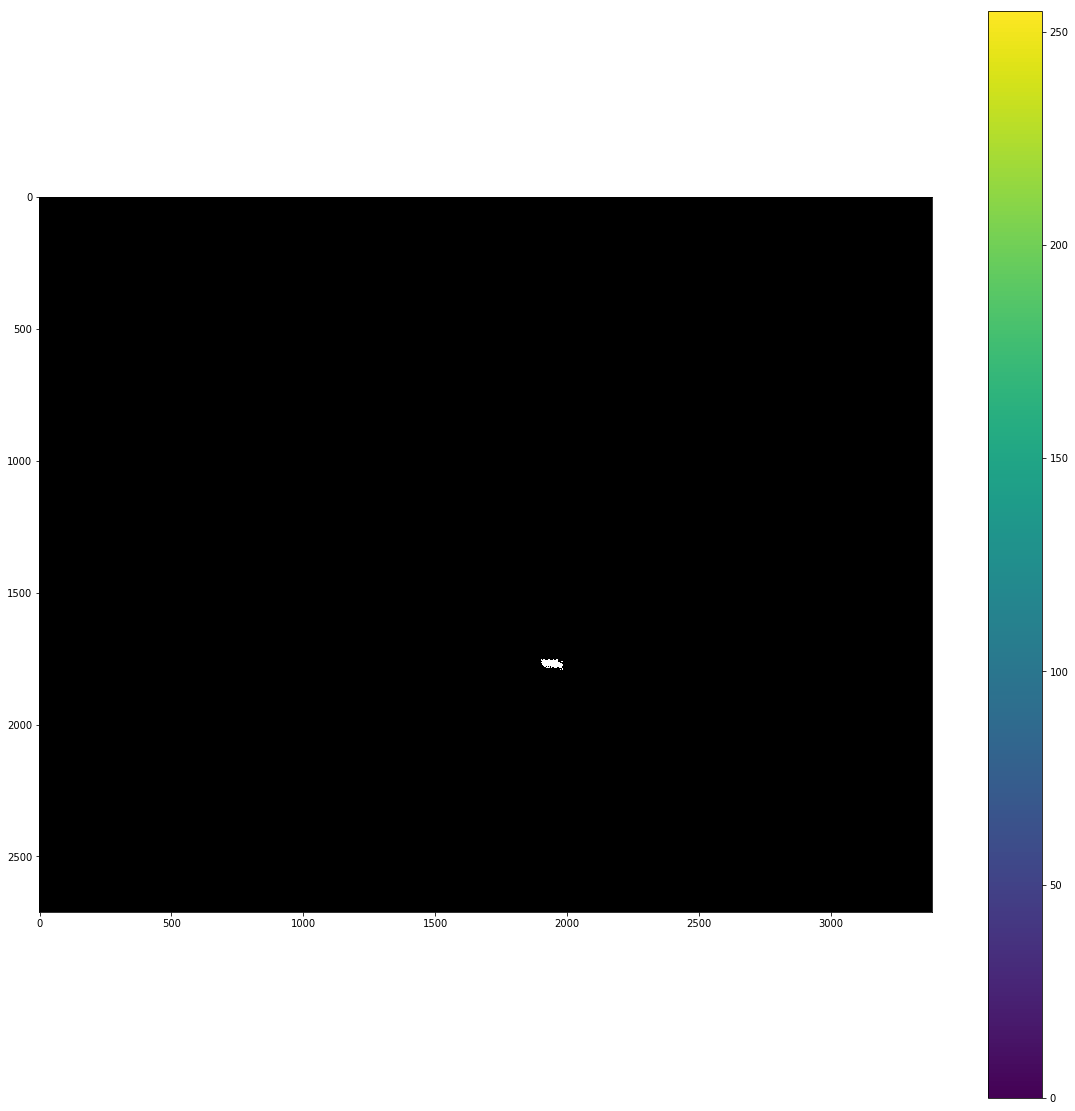

In [34]:
im = plt.imread(ignore_mask_path)
im.setflags(write=1)
print im.shape, im.dtype
plt.figure(figsize=(20, 20))
im[im>0]=255
plt.imshow(im)
plt.colorbar()
plt.show()
# uts.plot_images({'ignore_mask': im<255}, 
#                         layout=[1, 1], fig_size=5, save_fig=False, fig_name='ignore_mask')

(255, 1, 1518)

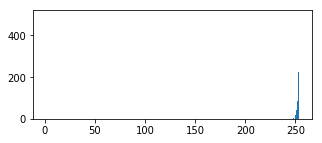

In [31]:
flat = im.flatten()
plt.hist(flat[(flat!=0) & (flat!=255)], bins=1000)
np.max(flat), np.min(flat), np.sum(np.logical_and(flat<255, flat>0))

[[  1.60148218e-01  -3.04005202e-03  -3.12802029e+00  -4.59593010e+00
    9.33073997e+00   5.08115005e+01]
 [  1.66774958e-01   1.52635034e-02  -3.10109210e+00  -8.19789982e+00
    7.45057011e+00   4.01997986e+01]
 [  1.43630490e-01  -1.59772694e-01  -3.13236523e+00   2.40197992e+00
    5.36997032e+00   2.46570988e+01]
 [  1.38680831e-01   6.09897310e-03  -3.08827925e+00  -3.99193001e+00
    2.12460003e+01   1.27617996e+02]]
(1356, 1692, 6) float32


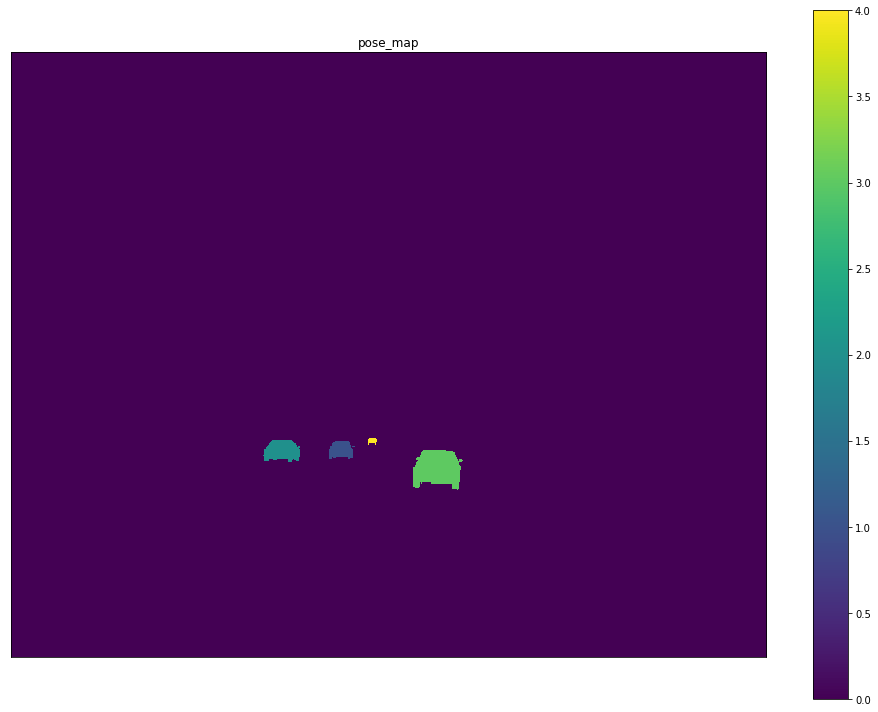

In [79]:
# Read .h5 files

# with h5py.File('aname-of-file.h5', 'r') as hf:
#     data = hf['name-of-dataset'][:]
print np.float32(pose_list_array)
print data.shape, data.dtype
import matplotlib.pyplot as plt
import utils.utils as uts
uts.plot_images({'pose_map': np.squeeze(np.uint8(seg_array))}, 
                layout=[1, 3], fig_size=40, save_fig=False, fig_name='pose_map')

# Read train/val splits

In [8]:
splits = ['train', 'val']
split_files_folder = '../apolloscape/3d_car_instance_sample/split'

text_file = open('%s/%s.txt'%(split_files_folder, splits[0]), "r")
lines = [line for line in text_file.read().split('\n') if '.jpg' in line]

print len(lines), lines

731 ['180116_053947113_Camera_5.jpg', '180116_053947909_Camera_5.jpg', '180116_053948523_Camera_5.jpg', '180116_053949115_Camera_5.jpg', '180116_053949654_Camera_5.jpg', '180116_053950107_Camera_5.jpg', '180116_053950495_Camera_5.jpg', '180116_053950833_Camera_5.jpg', '180116_053951149_Camera_5.jpg', '180116_053951445_Camera_5.jpg', '180116_053951717_Camera_5.jpg', '180116_053951969_Camera_5.jpg', '180116_053952221_Camera_5.jpg', '180116_053952450_Camera_5.jpg', '180116_053952679_Camera_5.jpg', '180116_053952888_Camera_5.jpg', '180116_053953097_Camera_5.jpg', '180116_053953306_Camera_5.jpg', '180116_053953515_Camera_5.jpg', '180116_053953702_Camera_5.jpg', '180116_053953889_Camera_5.jpg', '180116_053954076_Camera_5.jpg', '180116_053954263_Camera_5.jpg', '180116_053954450_Camera_5.jpg', '180116_053954637_Camera_5.jpg', '180116_053954824_Camera_5.jpg', '180116_053955011_Camera_5.jpg', '180116_053955198_Camera_5.jpg', '180116_053955385_Camera_5.jpg', '180116_053955572_Camera_5.jpg', '1801

# Obsolete

(1356, 1692, 6)


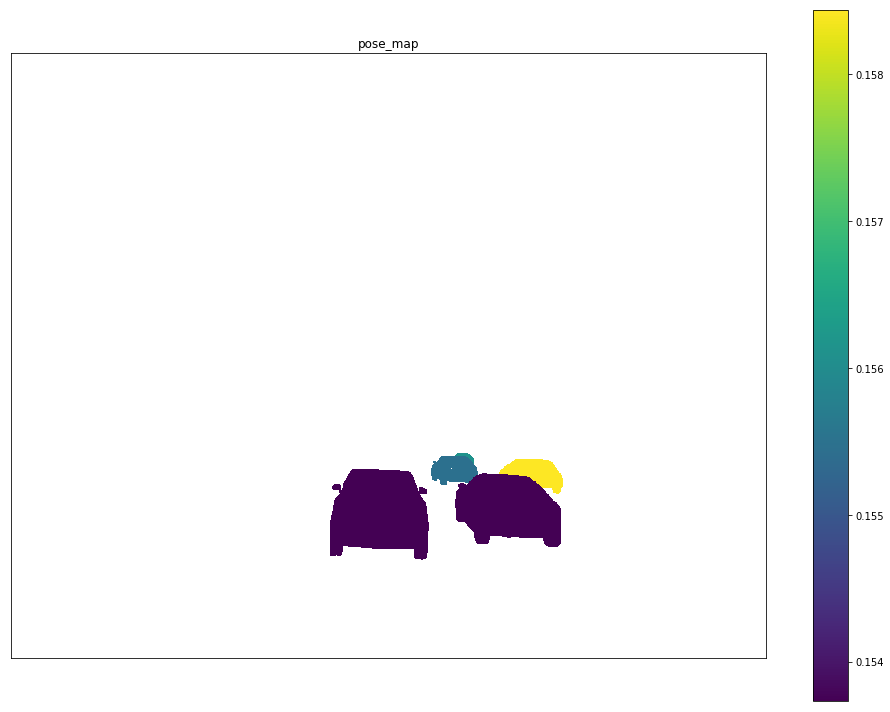

In [19]:
print pose_map.shape
import numpy as np
np.set_printoptions(threshold=np.nan)

import matplotlib.pyplot as plt
import utils.utils as uts
uts.plot_images({'pose_map': np.squeeze(pose_map[:, :, 0])}, 
                layout=[1, 3], fig_size=40, save_fig=False, fig_name='pose_map')

In [18]:
aa = pose_map.flatten().tolist()
bb = [np.float16(it) for it in pose_map.flatten()]
print len(aa), len(bb), pose_map.shape

13766112 13766112 (1356, 1692, 6)
